# Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from ydata_profiling import ProfileReport
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

# Connecting to SQL server

In [2]:
import pyodbc

# Database connection details
server = r'DESKTOP-SIH8RPO\SQLEXPRESSSERVER'  # Example: 'localhost' or 'DESKTOP-ABC\SQLEXPRESS'
database = 'CAP_EMPLOYEE'  # Your database name
trusted_connection = 'yes'  # Use Windows Authentication

# Create connection string
conn = pyodbc.connect(f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection={trusted_connection}")

# Test connection
print("Connected to SQL Server successfully!")


Connected to SQL Server successfully!


# Load Dataset 

In [7]:
# Made a duplicate of Merged_table
query = "SELECT * FROM merged_table"
df_merged = pd.read_sql(query, conn)

# Convert Date Columns to DateTime
df_merged['hire_date'] = pd.to_datetime(df_merged['hire_date'])
df_merged['last_date'] = pd.to_datetime(df_merged['last_date'])
df_merged['birth_date'] = pd.to_datetime(df_merged['birth_date'])


In [8]:
# Made a duplicate of final_table
query = "SELECT * FROM final_table"
df_final = pd.read_sql(query, conn)

# Convert Date Columns to DateTime
df_final['hire_date'] = pd.to_datetime(df_final['hire_date'])
df_final['last_date'] = pd.to_datetime(df_final['last_date'])
df_final['birth_date'] = pd.to_datetime(df_final['birth_date'])


In [9]:
# for convinience

df=df_final.copy()

# Data Preprocessing

## Data Understanding

In [ ]:
#Profiling of Merged_table

profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df.head()

emp_no emp_title_id birth_date first_name last_name sex  hire_date  \
0   10001        e0003 1953-09-02     Georgi   Facello   M 1986-06-26   
1   10002        s0001 1964-06-02    Bezalel    Simmel   F 1985-11-21   
2   10003        e0003 1959-12-03      Parto   Bamford   M 1986-08-28   
3   10004        e0003 1954-05-01  Chirstian   Koblick   M 1986-12-01   
4   10005        s0001 1955-01-21    Kyoichi  Maliniak   M 1989-09-12   

   no_of_projects last_performance_rating  left  last_date  salary  \
0               9                       C     1 1994-07-30   60117   
1               8                       B     0 2000-01-28   65828   
2               1                       C     0 2000-01-28   40006   
3               5                       A     0 2000-01-28   40054   
4               6                       A     0 2000-01-28   78228   

  primary_dept_no primary_dept_name other_dept_no other_dept_name title_id  \
0            d005       Development          None            None    e0003   
1            d007             Sales          None            None    s0001   
2            d004        Production          None            None    e0003   
3            d004        Production          None            None    e0003   
4            d003   Human Resources          None            None    s0001   

             title  age  tenure  
0  Senior Engineer   32    8.10  
1            Staff   21   14.19  
2  Senior Engineer   26   13.43  
3  Senior Engineer   32   13.17  
4            Staff   34   10.38

In [10]:
df.tail()

emp_no emp_title_id birth_date first_name last_name sex  hire_date  \
300019  499995        e0002 1958-09-24     Dekang  Lichtner   F 1993-01-12   
300020  499996        e0003 1953-03-07       Zito      Baaz   M 1990-09-27   
300021  499997        e0003 1961-08-03    Berhard    Lenart   M 1986-04-21   
300022  499998        s0001 1956-09-05   Patricia   Breugel   M 1993-10-13   
300023  499999        e0002 1958-05-01     Sachin   Tsukuda   M 1997-11-30   

        no_of_projects last_performance_rating  left  last_date  salary  \
300019               5                       B     0 2000-01-28   40000   
300020               8                       B     1 1995-12-15   58058   
300021              10                       B     0 2000-01-28   49597   
300022               1                       B     0 2000-01-28   40000   
300023               8                       A     0 2000-01-28   63707   

       primary_dept_no primary_dept_name other_dept_no other_dept_name  \
300019            d004        Production          None            None   
300020            d004        Production          None            None   
300021            d005       Development          None            None   
300022            d002           Finance          None            None   
300023            d004        Production          None            None   

       title_id            title  age  tenure  
300019    e0002         Engineer   34    7.05  
300020    e0003  Senior Engineer   37    5.22  
300021    e0003  Senior Engineer   24   13.78  
300022    s0001            Staff   37    6.30  
300023    e0002         Engineer   39    2.16

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   emp_no                   300024 non-null  int64         
 1   emp_title_id             300024 non-null  object        
 2   birth_date               300024 non-null  datetime64[ns]
 3   first_name               300024 non-null  object        
 4   last_name                300024 non-null  object        
 5   sex                      300024 non-null  object        
 6   hire_date                300024 non-null  datetime64[ns]
 7   no_of_projects           300024 non-null  int64         
 8   last_performance_rating  300024 non-null  object        
 9   left                     300024 non-null  int64         
 10  last_date                300024 non-null  datetime64[ns]
 11  salary                   300024 non-null  int64         
 12  primary_dept_no 

In [12]:
df.isnull().sum()

emp_no                     0
emp_title_id               0
birth_date                 0
first_name                 0
last_name                  0
sex                        0
hire_date                  0
no_of_projects             0
last_performance_rating    0
left                       0
last_date                  0
salary                     0
primary_dept_no            0
primary_dept_name          0
other_dept_no              0
other_dept_name            0
title_id                   0
title                      0
age                        0
tenure                     0
dtype: int64

In [13]:
# Percentage of null values
df.isnull().sum()/df.shape[0]*100

emp_no                     0.0
emp_title_id               0.0
birth_date                 0.0
first_name                 0.0
last_name                  0.0
sex                        0.0
hire_date                  0.0
no_of_projects             0.0
last_performance_rating    0.0
left                       0.0
last_date                  0.0
salary                     0.0
primary_dept_no            0.0
primary_dept_name          0.0
other_dept_no              0.0
other_dept_name            0.0
title_id                   0.0
title                      0.0
age                        0.0
tenure                     0.0
dtype: float64

In [18]:
# Check for duplicates
df.duplicated().sum

<bound method Series.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
300019    False
300020    False
300021    False
300022    False
300023    False
Length: 300024, dtype: bool>

In [20]:
# identifing garbage values
for i in df.select_dtypes(include=['object']).columns:
    print(df[i].value_counts())
    print("***"*10)

emp_title_id
s0001    107384
e0003     97747
e0002     47303
s0002     26583
e0004     15148
e0001      5835
m0001        24
Name: count, dtype: int64
******************************
first_name
Shahab       295
Tetsushi     291
Elgin        279
Anyuan       278
Huican       276
            ... 
Jaroslava    193
Ebbe         190
Renny        185
Lech         185
April          1
Name: count, Length: 1276, dtype: int64
******************************
last_name
Baba          226
Gelosh        223
Coorg         223
Sudbeck       222
Farris        222
             ... 
Zykh          148
Guardalben    148
Merro         147
Sadowsky      145
Foolsday        1
Name: count, Length: 1638, dtype: int64
******************************
sex
M    179973
F    120051
Name: count, dtype: int64
******************************
last_performance_rating
B      107154
A       95919
C       71304
PIP     15105
S       10542
Name: count, dtype: int64
******************************
primary_dept_no
d005    81293
d004

In [25]:
df.describe()

emp_no                     birth_date  \
count  300024.000000                         300024   
mean   253321.763392  1958-07-31 16:12:23.268538560   
min     10001.000000            1952-02-01 00:00:00   
25%     85006.750000            1955-05-01 00:00:00   
50%    249987.500000            1958-08-01 00:00:00   
75%    424993.250000            1961-10-28 00:00:00   
max    499999.000000            1965-02-01 00:00:00   
std    161828.235540                            NaN   

                           hire_date  no_of_projects           left  \
count                         300024   300024.000000  300024.000000   
mean   1990-01-28 17:39:00.388768768        5.504826       0.099549   
min              1985-01-01 00:00:00        1.000000       0.000000   
25%              1987-02-08 00:00:00        3.000000       0.000000   
50%              1989-06-20 00:00:00        6.000000       0.000000   
75%              1992-07-30 00:00:00        8.000000       0.000000   
max              2000-01-28 00:00:00       10.000000       1.000000   
std                              NaN        2.872074       0.299398   

                           last_date         salary            age  \
count                         300024  300024.000000  300024.000000   
mean   1999-10-29 19:52:28.740100864   52970.732451      30.997237   
min              1986-07-17 00:00:00   40000.000000      20.000000   
25%              2000-01-28 00:00:00   40000.000000      27.000000   
50%              2000-01-28 00:00:00   48681.000000      31.000000   
75%              2000-01-28 00:00:00   61758.000000      34.000000   
max              2013-03-10 00:00:00  129492.000000      47.000000   
std                              NaN   14301.478491       5.151811   

              tenure  
count  300024.000000  
mean        9.756417  
min         0.000000  
25%         7.140000  
50%        10.340000  
75%        12.810000  
max        15.080000  
std         3.606221

In [26]:
df.describe(include=['object'])

emp_title_id first_name last_name     sex last_performance_rating  \
count        300024     300024    300024  300024                  300024   
unique            7       1276      1638       2                       5   
top           s0001     Shahab      Baba       M                       B   
freq         107384        295       226  179973                  107154   

       primary_dept_no primary_dept_name other_dept_no other_dept_name  \
count           300024            300024        300024          300024   
unique               9                 9             7               7   
top               d005       Development          None            None   
freq             81293             81293        268445          268445   

       title_id   title  
count    300024  300024  
unique        7       7  
top       s0001   Staff  
freq     107384  107384

## Plots

#### Histogram

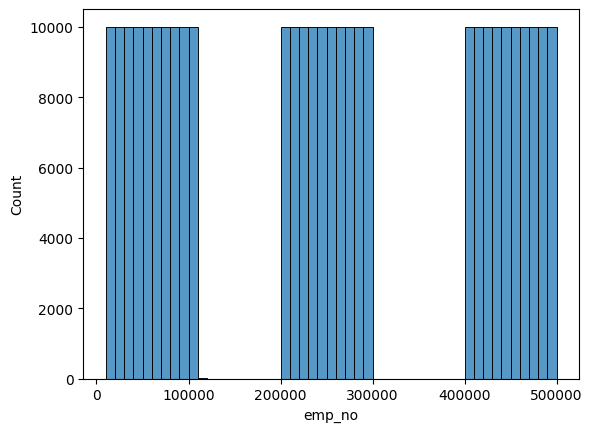

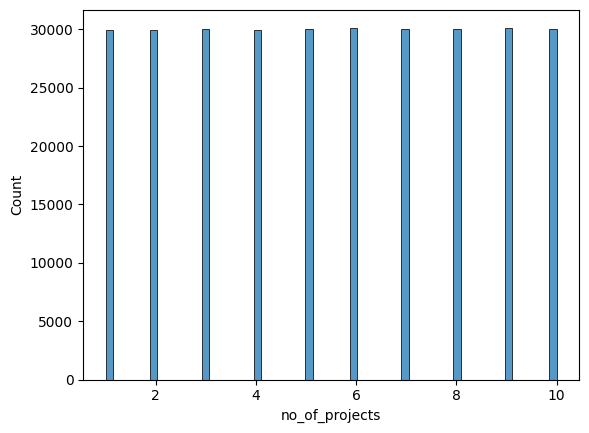

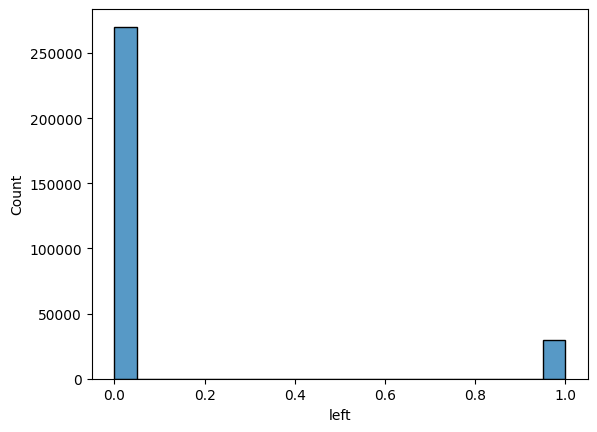

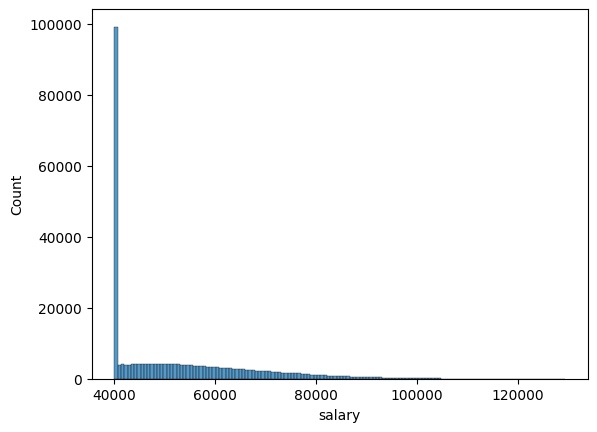

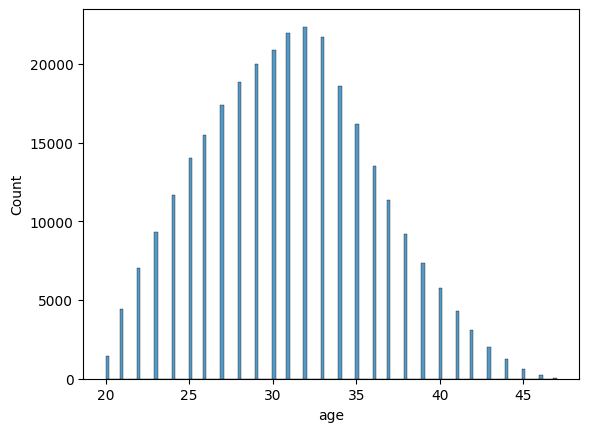

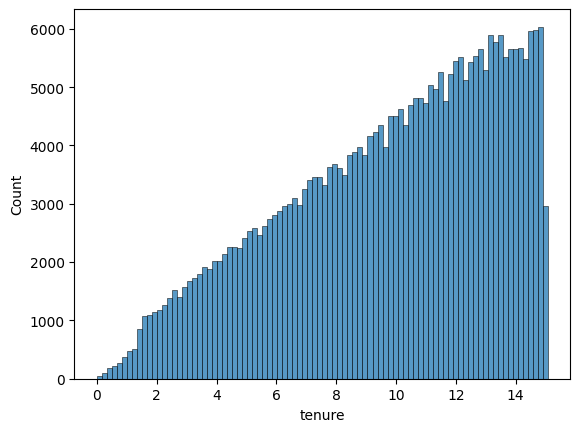

In [27]:
# histogram to understand the distribution

for i in df.select_dtypes(include=['int64','float64']).columns:
    sns.histplot(data=df,x=i)
    plt.show()

#### Box Plot

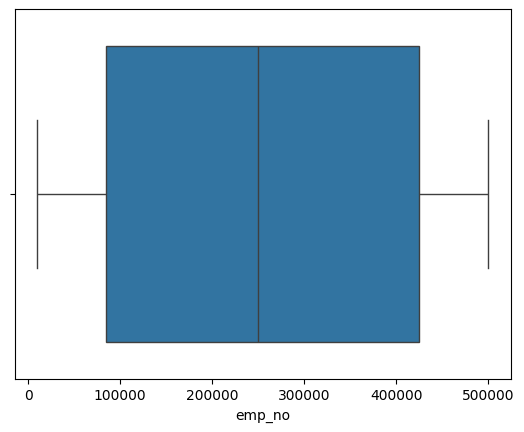

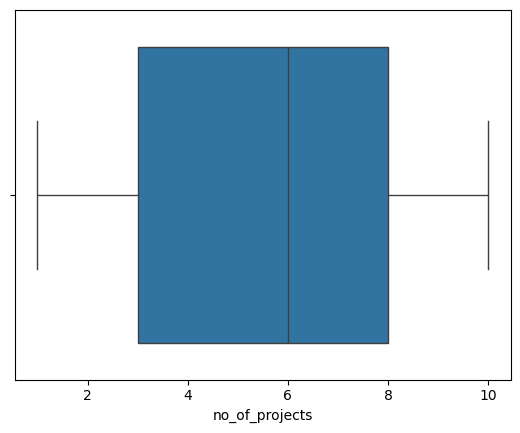

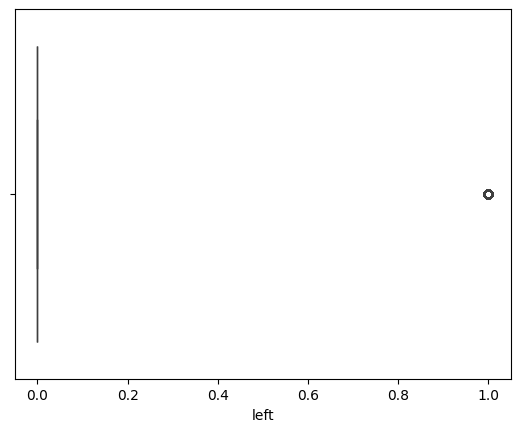

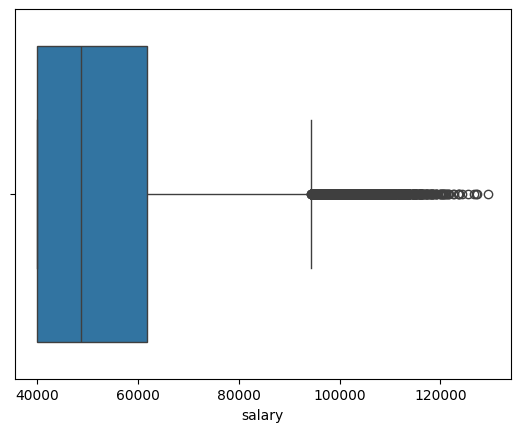

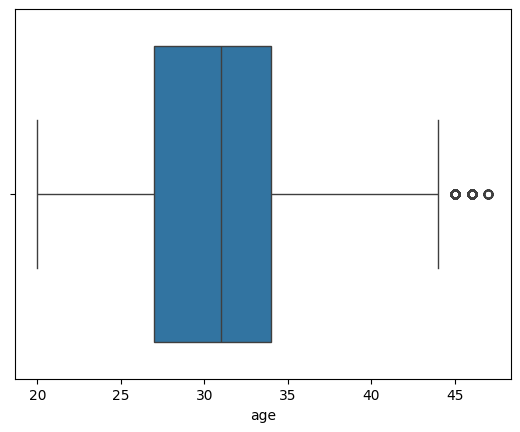

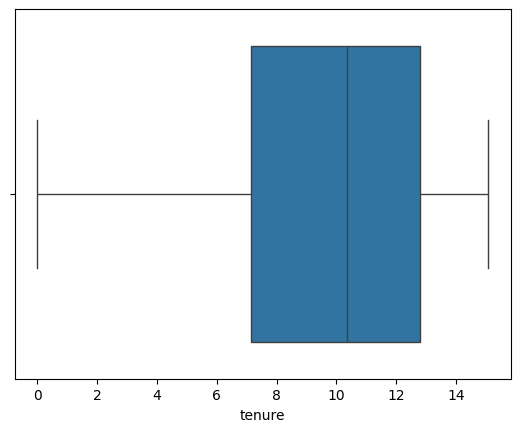

In [28]:
# boxplot to understand the distribution

for i in df.select_dtypes(include=['int64','float64']).columns:
    sns.boxplot(data=df,x=i)
    plt.show()

#### Scatter Plot

In [30]:
df.columns

Index(['emp_no', 'emp_title_id', 'birth_date', 'first_name', 'last_name',
       'sex', 'hire_date', 'no_of_projects', 'last_performance_rating', 'left',
       'last_date', 'salary', 'primary_dept_no', 'primary_dept_name',
       'other_dept_no', 'other_dept_name', 'title_id', 'title', 'age',
       'tenure'],
      dtype='object')

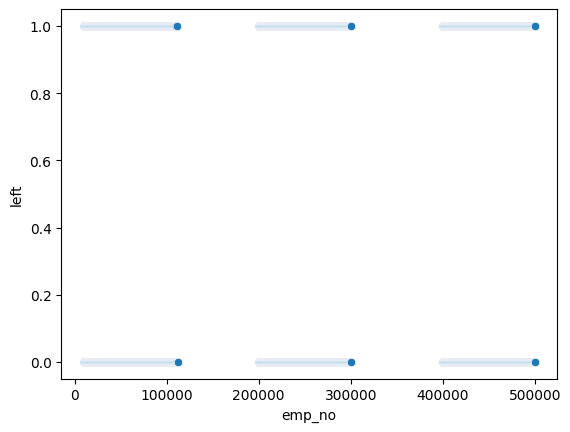

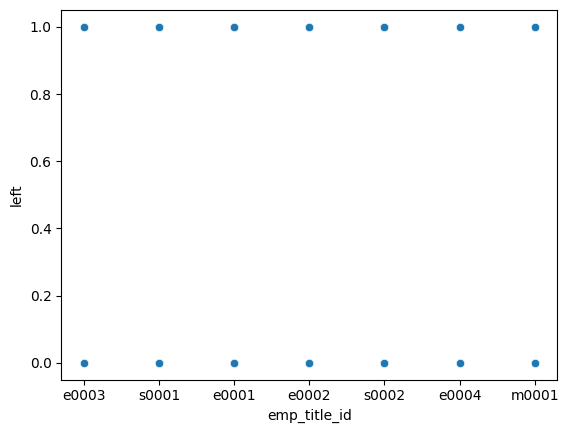

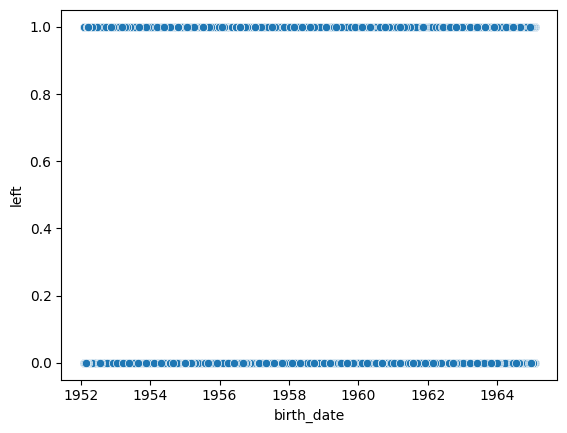

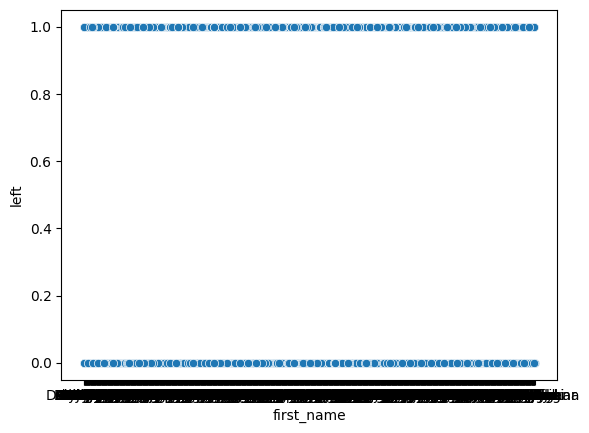

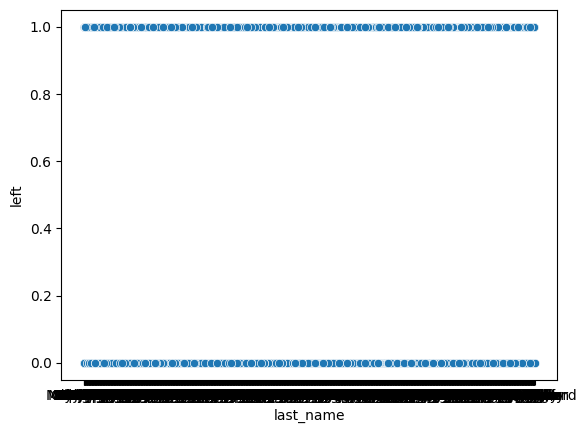

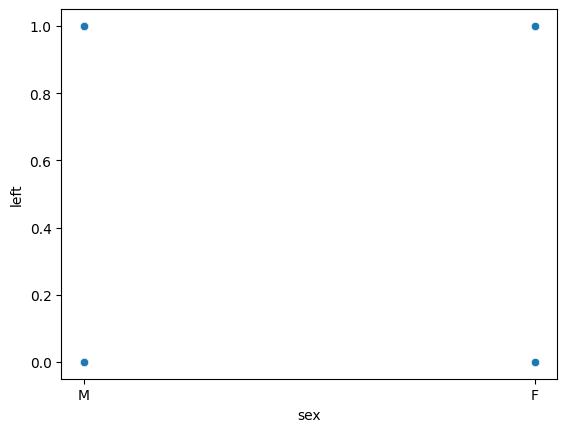

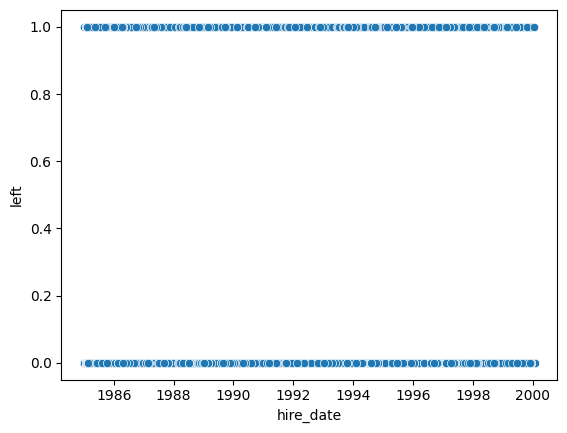

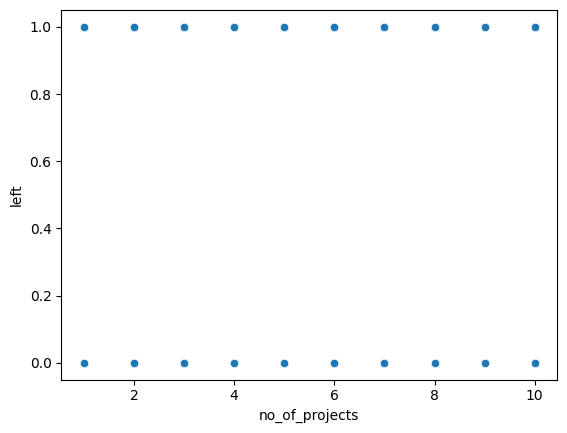

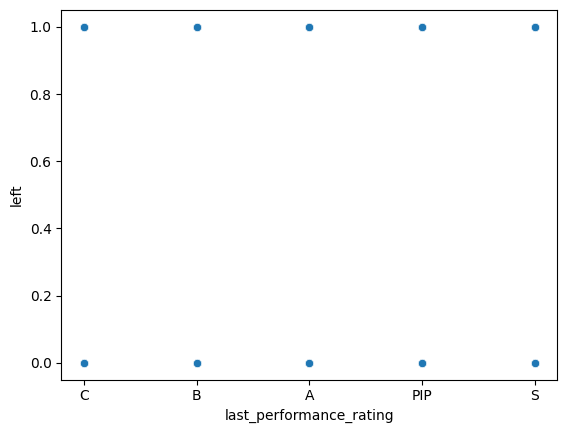

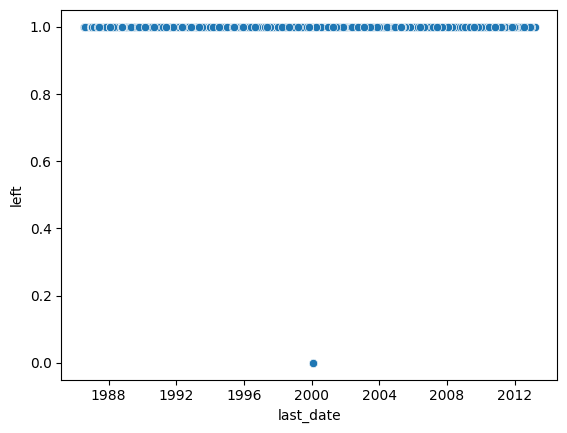

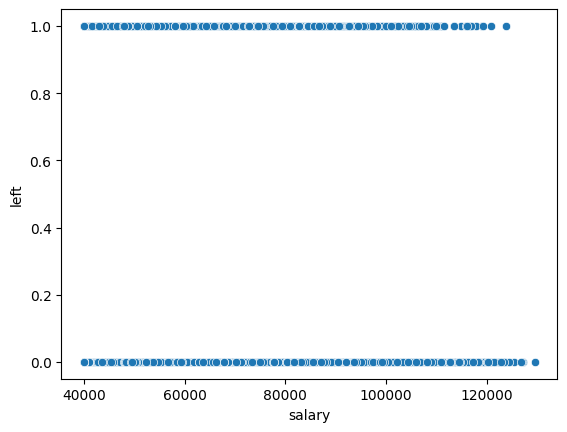

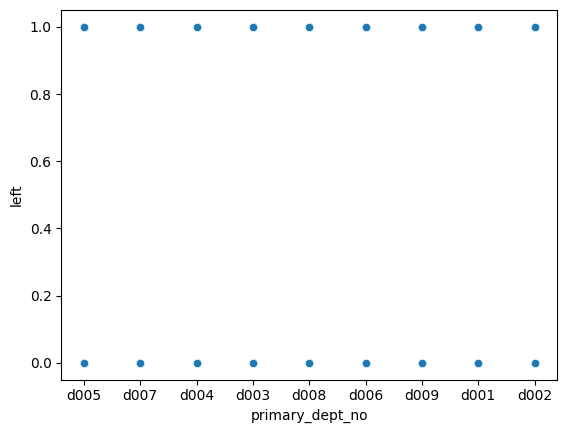

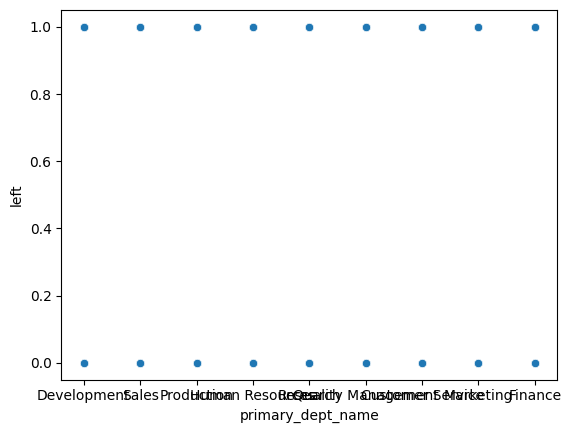

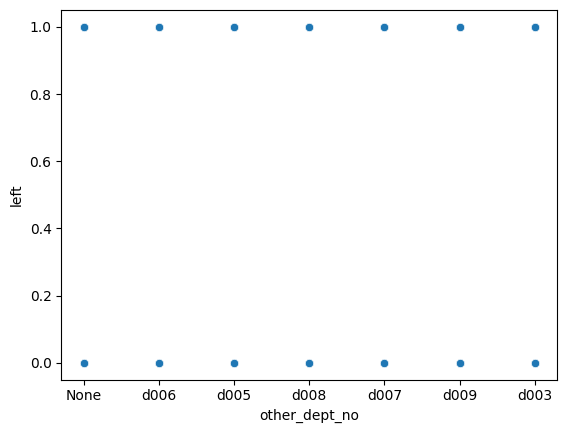

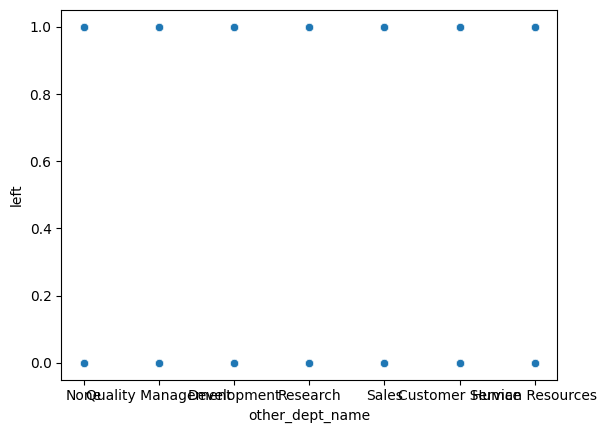

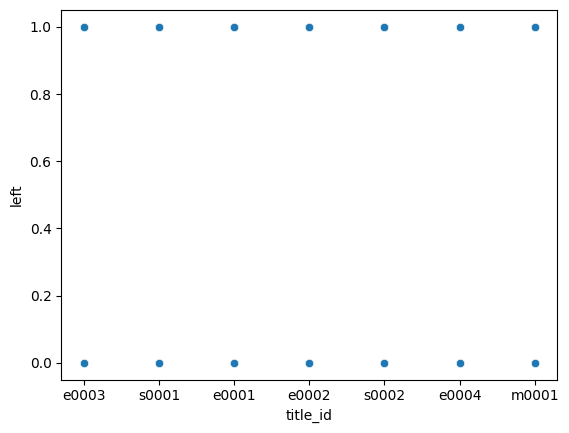

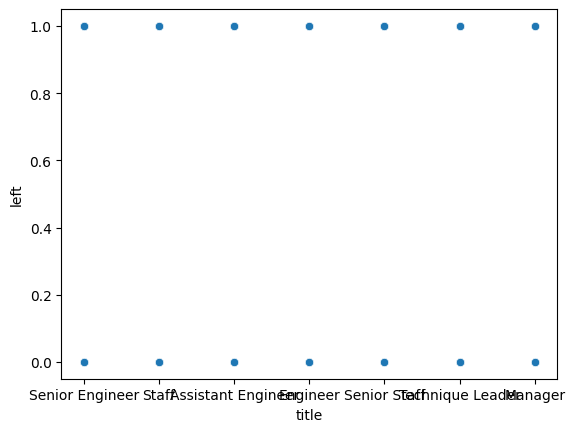

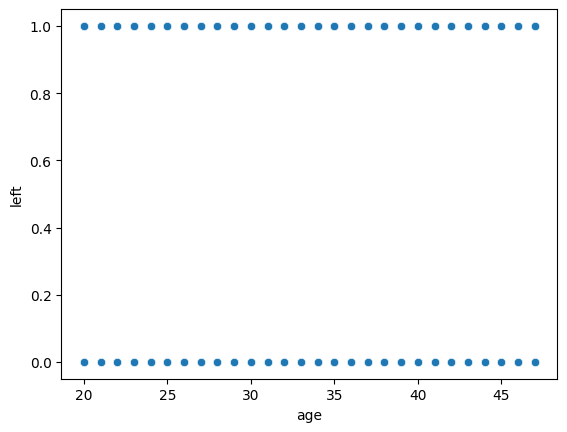

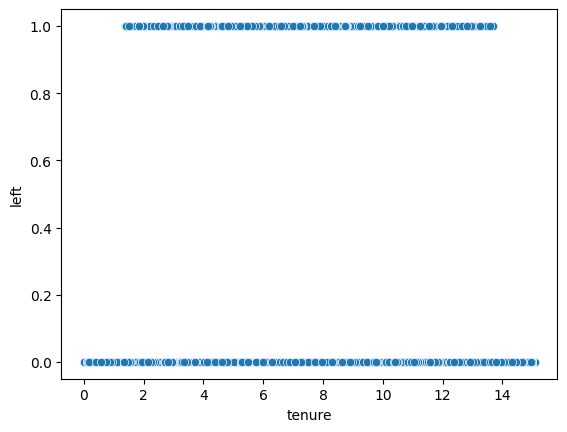

In [32]:
# scatterplot to understand the distribution

for i in ['emp_no', 'emp_title_id', 'birth_date', 'first_name', 'last_name',
       'sex', 'hire_date', 'no_of_projects', 'last_performance_rating',
       'last_date', 'salary', 'primary_dept_no', 'primary_dept_name',
       'other_dept_no', 'other_dept_name', 'title_id', 'title', 'age',
       'tenure']:
       sns.scatterplot(data=df,x=i,y='left')
       plt.show()

#### Heatmap

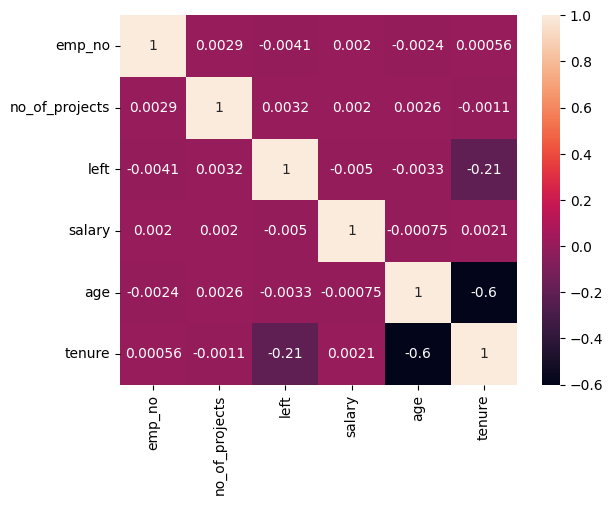

In [ ]:
# correlation matrix with heatmap

s=df.select_dtypes(include="number").corr()

#plot the heatmap

sns.heatmap(s,annot=True)
plt.show()

## Feature Eng.

In [7]:
feature_with_na = [feature for feature in df_final.columns if df_final[feature].isnull().sum() > 1]

for feature in feature_with_na:
    print(feature, np.round(df_final[feature].isnull().mean(), 4),  ' % missing values')

last_date 0.9005  % missing values


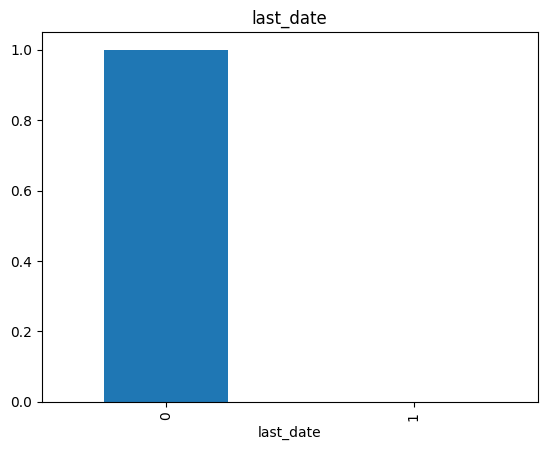

In [8]:
for feature in feature_with_na:
    data=df_final.copy()

    data[feature]=np.where(data[feature].isnull(),1,0)

    data.groupby(feature)['left'].median().plot.bar()
    plt.title(feature)
    plt.show()


Numerical variable

In [9]:
numerical_features = [feature for feature in df_final.columns if df_final[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

df_final[numerical_features].head()

Number of numerical variables:  7


emp_no birth_date  hire_date  no_of_projects  left  last_date  salary
0   10001 1953-09-02 1986-06-26               9     1 1994-07-30   60117
1   10002 1964-06-02 1985-11-21               8     0        NaT   65828
2   10003 1959-12-03 1986-08-28               1     0        NaT   40006
3   10004 1954-05-01 1986-12-01               5     0        NaT   40054
4   10005 1955-01-21 1989-09-12               6     0        NaT   78228

Temporal Variable (DateTime Variables)

In [10]:
year_feature = [feature for feature in numerical_features if 'date' in feature]

year_feature

['birth_date', 'hire_date', 'last_date']

In [11]:
for feature in year_feature:
    print(feature, df_final[feature].unique())

birth_date <DatetimeArray>
['1953-09-02 00:00:00', '1964-06-02 00:00:00', '1959-12-03 00:00:00',
 '1954-05-01 00:00:00', '1955-01-21 00:00:00', '1953-04-20 00:00:00',
 '1957-05-23 00:00:00', '1958-02-19 00:00:00', '1952-04-19 00:00:00',
 '1963-06-01 00:00:00',
 ...
 '1958-12-02 00:00:00', '1962-04-08 00:00:00', '1953-12-06 00:00:00',
 '1959-11-19 00:00:00', '1961-10-26 00:00:00', '1961-10-13 00:00:00',
 '1962-08-20 00:00:00', '1957-12-31 00:00:00', '1958-07-31 00:00:00',
 '1952-02-01 00:00:00']
Length: 4750, dtype: datetime64[ns]
hire_date <DatetimeArray>
['1986-06-26 00:00:00', '1985-11-21 00:00:00', '1986-08-28 00:00:00',
 '1986-12-01 00:00:00', '1989-09-12 00:00:00', '1989-06-02 00:00:00',
 '1989-02-10 00:00:00', '1994-09-15 00:00:00', '1985-02-18 00:00:00',
 '1989-08-24 00:00:00',
 ...
 '1999-12-06 00:00:00', '2000-01-28 00:00:00', '1999-09-03 00:00:00',
 '1999-07-07 00:00:00', '1999-07-13 00:00:00', '1999-12-12 00:00:00',
 '1999-07-08 00:00:00', '1999-09-15 00:00:00', '1999-11-26 

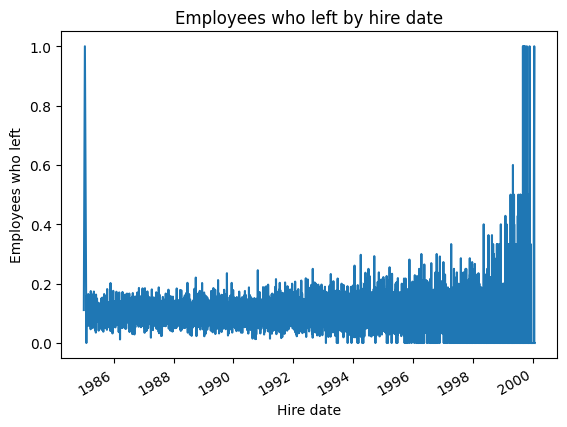

In [12]:
df_final.groupby('hire_date')['left'].mean().plot()
plt.xlabel('Hire date')
plt.ylabel('Employees who left')
plt.title('Employees who left by hire date')
plt.show()

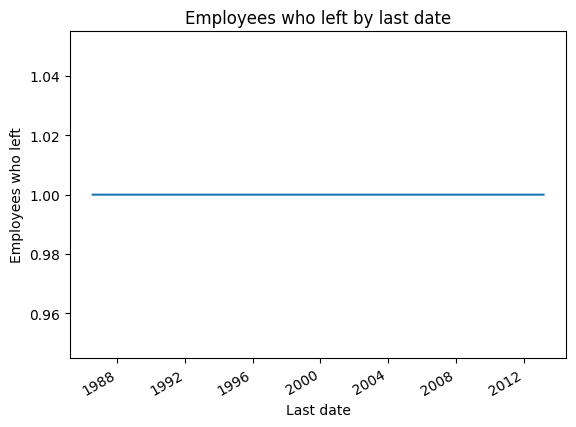

In [12]:
df_final.groupby('last_date')['left'].mean().plot()
plt.xlabel('Last date')
plt.ylabel('Employees who left')
plt.title('Employees who left by last date')
plt.show()

Numerical Variables are of 2 types:
1. Continuous Variables
2. Discrete Variables


In [13]:
discrete_features =[feature for feature in numerical_features if len(df_final[feature].unique())<25 and feature not in year_feature+['emp_no']]

print("Discrete Variables count: {}".format(len(discrete_features)))

df_final[discrete_features].head()

Discrete Variables count: 2


no_of_projects  left
0               9     1
1               8     0
2               1     0
3               5     0
4               6     0

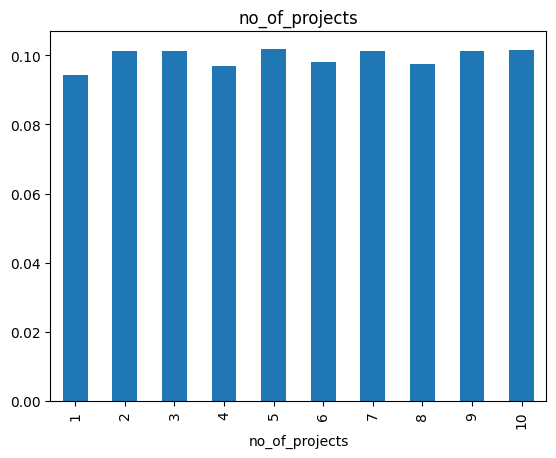

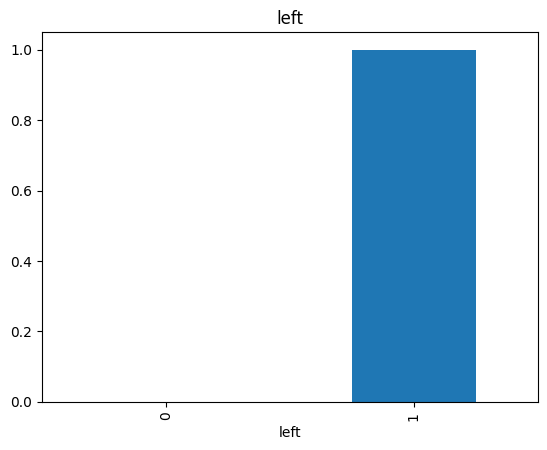

In [14]:
for feature in discrete_features:
    data=df_final.copy()
    data.groupby(feature)['left'].mean().plot.bar()
    plt.title(feature)
    plt.show()

In [15]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features+year_feature+['emp_no']]

print("Continuous Variables count: {}".format(len(continuous_features)))

Continuous Variables count: 1


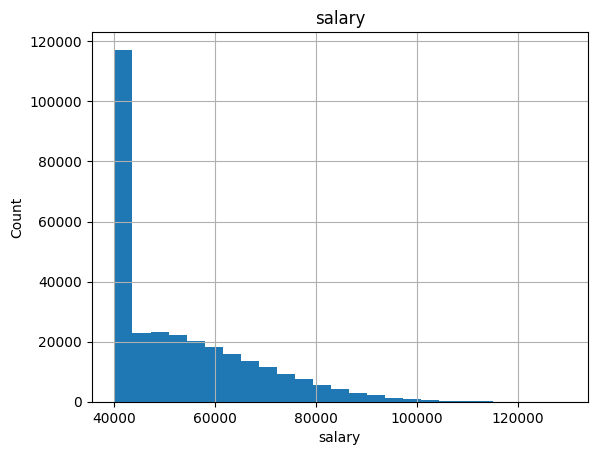

In [16]:
for feature in continuous_features:
    data=df_final.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

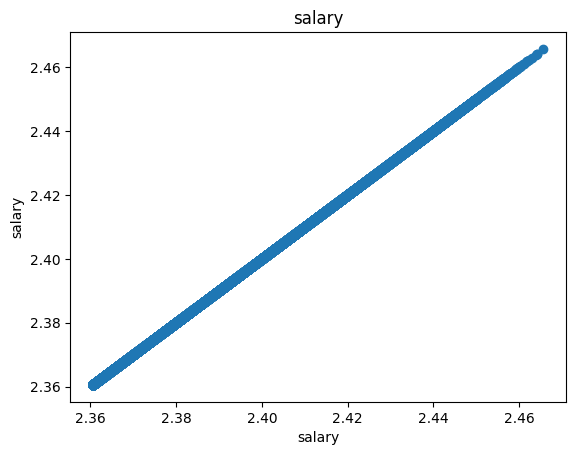

In [17]:


for feature in continuous_features:
    data=df_final.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['salary']=np.log(data['salary'])
        plt.scatter(data[feature], data['salary'])
        plt.xlabel(feature)
        plt.ylabel('salary')
        plt.title(feature)
        plt.show()

Outhliers

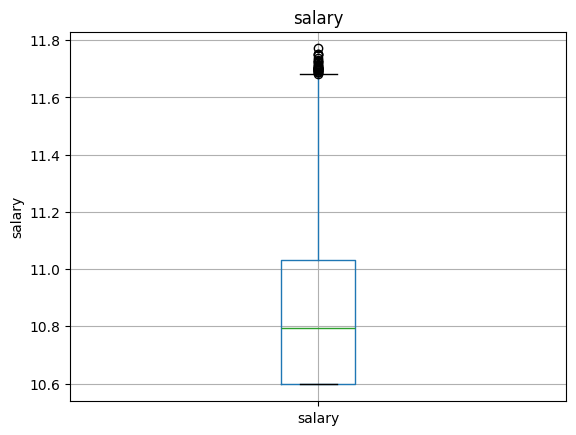

In [18]:
for feature in continuous_features:
    data=df_final.copy()

    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

Categorical variables

In [14]:
categorical_features=[feature for feature in df_final.columns if df_final[feature].dtypes == 'O']

print("Categorical Variables count: {}".format(len(categorical_features)))

df_final[categorical_features].head()

Categorical Variables count: 11


emp_title_id first_name last_name sex last_performance_rating  \
0        e0003     Georgi   Facello   M                       C   
1        s0001    Bezalel    Simmel   F                       B   
2        e0003      Parto   Bamford   M                       C   
3        e0003  Chirstian   Koblick   M                       A   
4        s0001    Kyoichi  Maliniak   M                       A   

  primary_dept_no primary_dept_name other_dept_no other_dept_name title_id  \
0            d005       Development          None            None    e0003   
1            d007             Sales          None            None    s0001   
2            d004        Production          None            None    e0003   
3            d004        Production          None            None    e0003   
4            d003   Human Resources          None            None    s0001   

             title  
0  Senior Engineer  
1            Staff  
2  Senior Engineer  
3  Senior Engineer  
4            Staff

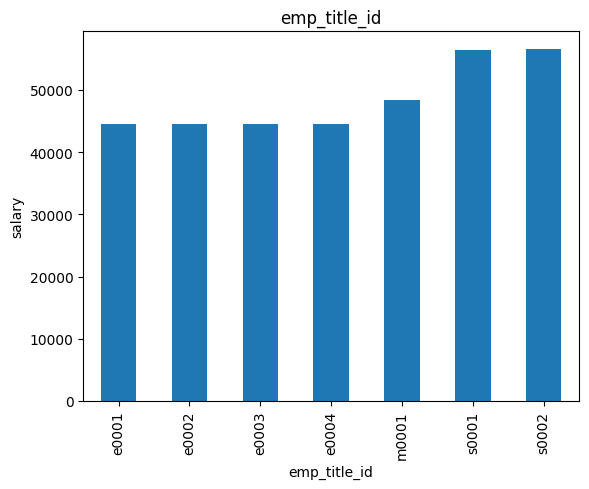

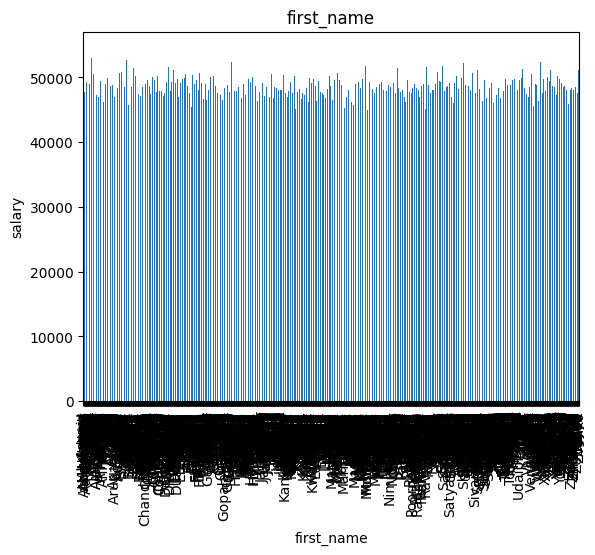

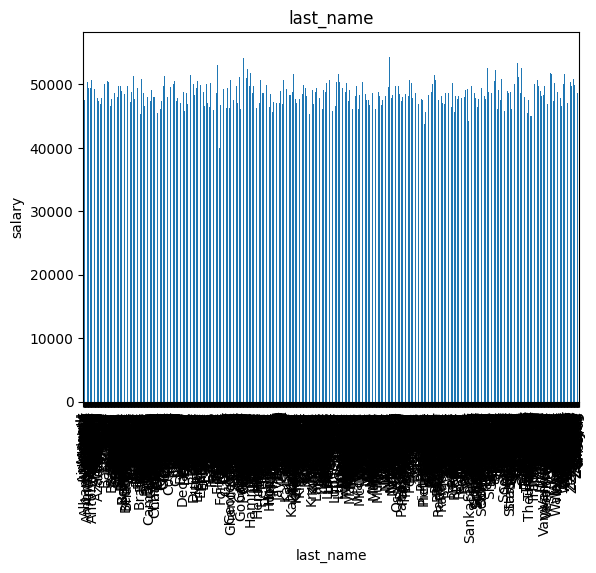

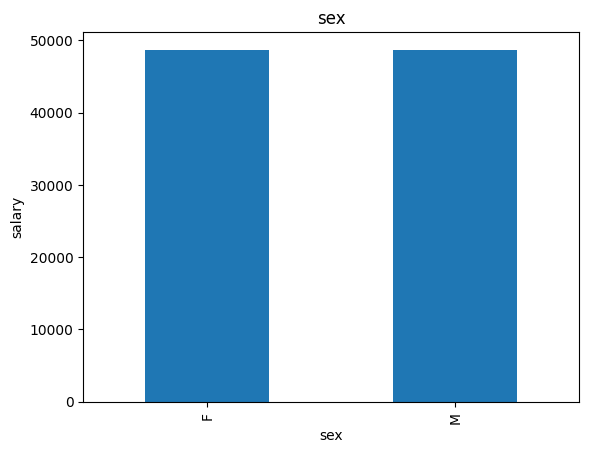

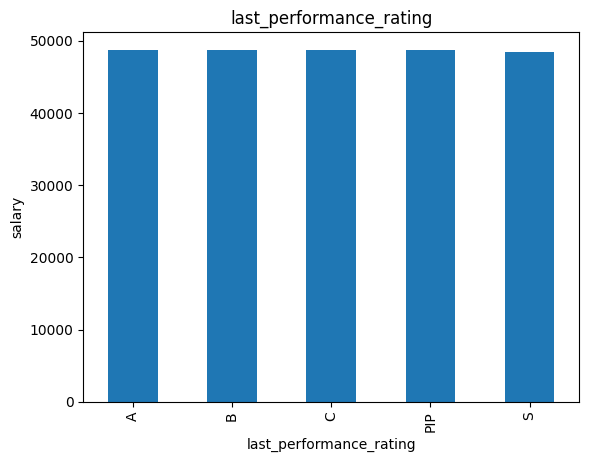

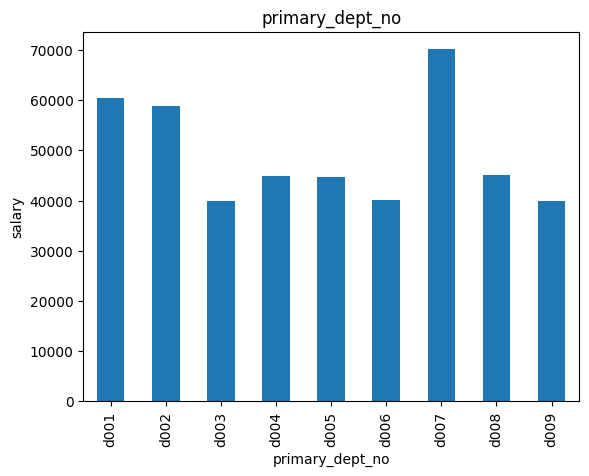

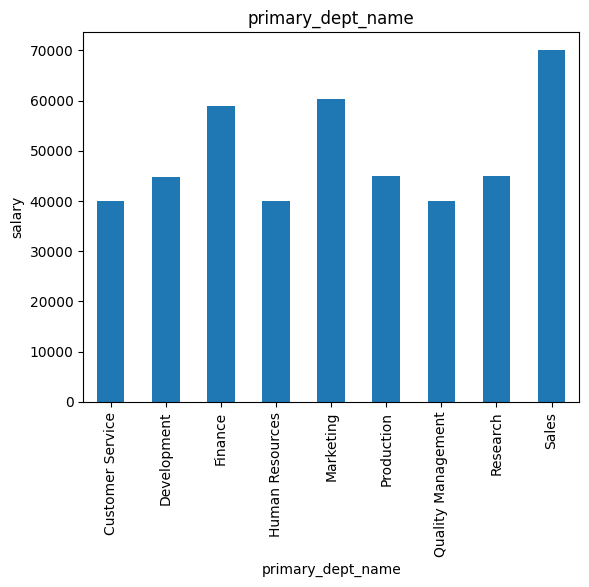

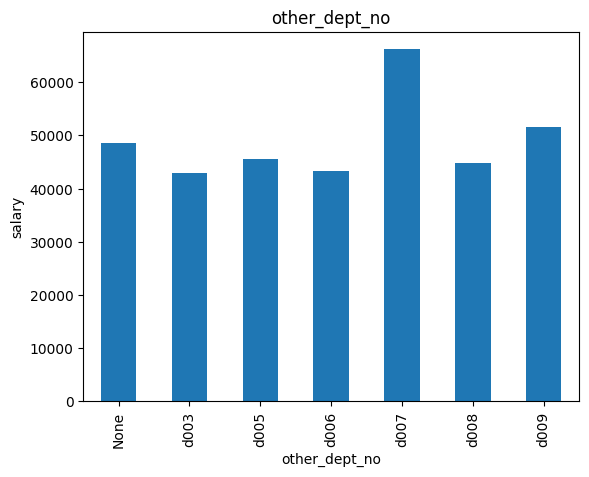

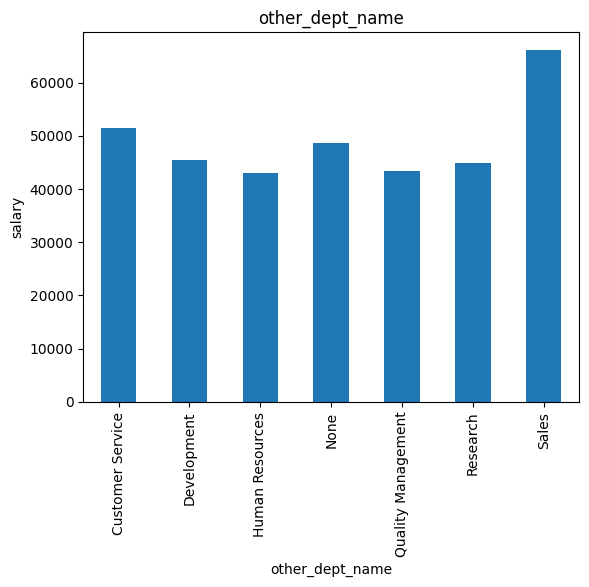

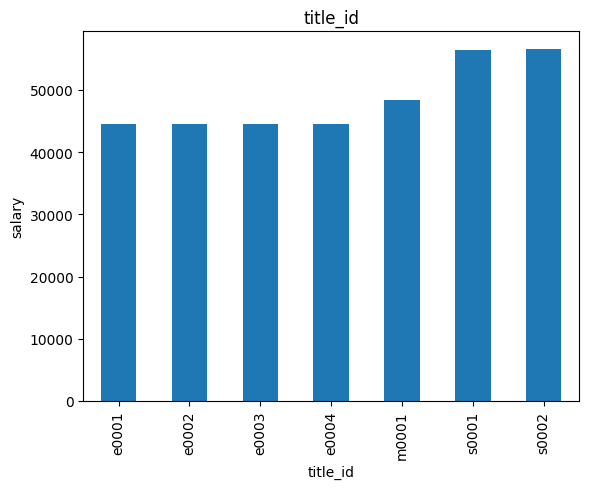

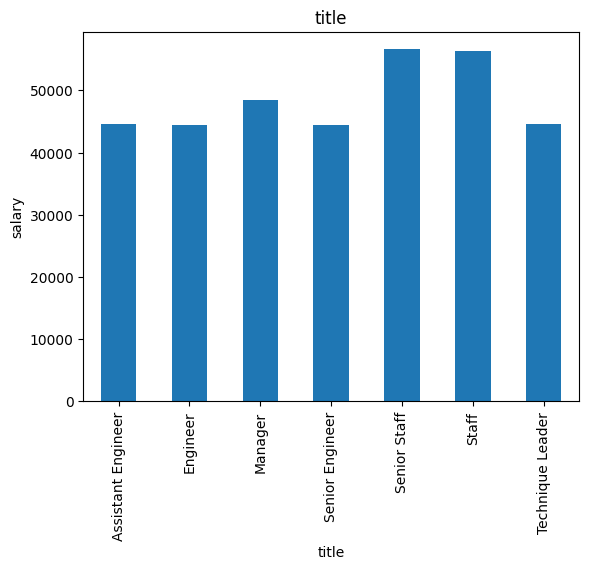

In [20]:
for feature in categorical_features:
    data=df_final.copy() 
    data.groupby(feature)['salary'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('salary')
    plt.title(feature)
    plt.show()

<Axes: xlabel='left', ylabel='salary'>

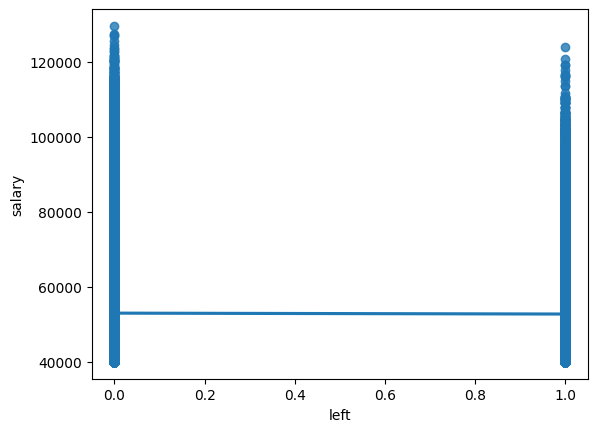

In [28]:
import seaborn as sns
sns.regplot(x="left", y="salary", data=df_final)

#### Missing Values

In [7]:
# Categorical feature which are missing

features_nan=[feature for feature in df_final.columns if df_final[feature].isnull().sum()>1 and df_final[feature].dtypes == 'O']

for feature in features_nan:
    print("{}: {} % missing values".format(feature,np.round(df_final[feature].isnull().mean(),4)))

features_nan


[]

### Data preprocessing

Filling null values of last_date 

In [10]:
# Calculate the latest hire_date in the dataset
latest_hire_date = df_final['hire_date'].max()

# Fill missing 'last_date' with the latest 'hire_date' 
df_final['last_date'] = df_final['last_date'].fillna(latest_hire_date)


In [11]:
df_final['birth_date'] = df_final['birth_date'].apply(lambda x:x.to_pydatetime())
df_final['hire_date'] = df_final['hire_date'].apply(lambda x:x.to_pydatetime())
df_final['last_date'] = df_final['last_date'].apply(lambda x:x.to_pydatetime())


In [12]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   emp_no                   300024 non-null  int64         
 1   emp_title_id             300024 non-null  object        
 2   birth_date               300024 non-null  datetime64[ns]
 3   first_name               300024 non-null  object        
 4   last_name                300024 non-null  object        
 5   sex                      300024 non-null  object        
 6   hire_date                300024 non-null  datetime64[ns]
 7   no_of_projects           300024 non-null  int64         
 8   last_performance_rating  300024 non-null  object        
 9   left                     300024 non-null  int64         
 10  last_date                300024 non-null  datetime64[ns]
 11  salary                   300024 non-null  int64         
 12  primary_dept_no 

Creating Tenure and Age columns

In [13]:
# Calculate tenure (in years)

df_final['tenure'] = ((df_final['last_date'] - df_final['hire_date']).dt.days / 365).round(2)


In [14]:
# Ensure birth_date and hire_date are in datetime format
df_final['birth_date'] = pd.to_datetime(df_final['birth_date'], errors='coerce')
df_final['hire_date'] = pd.to_datetime(df_final['hire_date'], errors='coerce')

# Calculate age at the time of hiring
df_final['age'] = df_final['hire_date'].dt.year - df_final['birth_date'].dt.year


In [19]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   emp_no                   300024 non-null  int64         
 1   emp_title_id             300024 non-null  object        
 2   birth_date               300024 non-null  datetime64[ns]
 3   first_name               300024 non-null  object        
 4   last_name                300024 non-null  object        
 5   sex                      300024 non-null  object        
 6   hire_date                300024 non-null  datetime64[ns]
 7   no_of_projects           300024 non-null  int64         
 8   last_performance_rating  300024 non-null  object        
 9   left                     300024 non-null  int64         
 10  last_date                300024 non-null  datetime64[ns]
 11  salary                   300024 non-null  int64         
 12  primary_dept_no 

In [11]:
categorical_features=[feature for feature in df_final.columns if df_final[feature].dtypes == 'O']

categorical_features

['emp_title_id',
 'first_name',
 'last_name',
 'sex',
 'last_performance_rating',
 'primary_dept_no',
 'primary_dept_name',
 'other_dept_no',
 'other_dept_name',
 'title_id',
 'title']

#### Define Target and Features

- **`emp_no`**: Unique ID (doesn't help with prediction)
- **`first_name`, `last_name`**: Not useful for prediction
- **`hire_date`, `last_date`**: We will calculate tenure, so raw dates are not needed
- **`birth_date`**: Already calculated age, so raw dates are not needed
- **`primary_dept_no`, `other_dept_no`, `other_dept_name`**: Redundant if we keep `primary_dept_name`
- **`title_id`**: Title already exists, so it's redundant
- **`left`**:  Not used in feature

In [15]:
X = df_final.drop(columns=['emp_no','left','first_name','last_name','primary_dept_no','other_dept_no','title_id', 'birth_date', 'hire_date', 'last_date'])
y = df_final['left']

print(X)
print(y)

       emp_title_id sex  no_of_projects last_performance_rating  salary  \
0             e0003   M               9                       C   60117   
1             s0001   F               8                       B   65828   
2             e0003   M               1                       C   40006   
3             e0003   M               5                       A   40054   
4             s0001   M               6                       A   78228   
...             ...  ..             ...                     ...     ...   
300019        e0002   F               5                       B   40000   
300020        e0003   M               8                       B   58058   
300021        e0003   M              10                       B   49597   
300022        s0001   M               1                       B   40000   
300023        e0002   M               8                       A   63707   

       primary_dept_name other_dept_name            title  tenure  age  
0            Development  

Label Encoder on Ordinal 

In [16]:
#Convert performance ratings (Ordinal)
performance_order = {'PIP': 0, 'S': 1, 'C': 2, 'B': 3, 'A': 4}
X['last_performance_rating'] = X['last_performance_rating'].map(performance_order)


Categorical 

In [17]:
X = pd.get_dummies(X, columns=['emp_title_id', 'sex', 'title'], drop_first=True)

In [18]:
X['other_dept_name'] = X['other_dept_name'].replace('None', 'No_Dept') # Handle None

X = pd.get_dummies(X, columns=['primary_dept_name','other_dept_name'], prefix=['primary', 'other'], prefix_sep='_')

In [19]:
X

no_of_projects  last_performance_rating  salary  tenure  age  \
0                    9                        2   60117    8.10   33   
1                    8                        3   65828   14.19   21   
2                    1                        2   40006   13.43   27   
3                    5                        4   40054   13.17   32   
4                    6                        4   78228   10.38   34   
...                ...                      ...     ...     ...  ...   
300019               5                        3   40000    7.05   35   
300020               8                        3   58058    5.22   37   
300021              10                        3   49597   13.78   25   
300022               1                        3   40000    6.30   37   
300023               8                        4   63707    2.16   39   

        emp_title_id_e0002  emp_title_id_e0003  emp_title_id_e0004  \
0                    False                True               False   
1                    False               False               False   
2                    False                True               False   
3                    False                True               False   
4                    False               False               False   
...                    ...                 ...                 ...   
300019                True               False               False   
300020               False                True               False   
300021               False                True               False   
300022               False               False               False   
300023                True               False               False   

        emp_title_id_m0001  emp_title_id_s0001  ...  \
0                    False               False  ...   
1                    False                True  ...   
2                    False               False  ...   
3                    False               False  ...   
4                    False                True  ...   
...                    ...                 ...  ...   
300019               False               False  ...   
300020               False               False  ...   
300021               False               False  ...   
300022               False                True  ...   
300023               False               False  ...   

        primary_Quality Management  primary_Research  primary_Sales  \
0                            False             False          False   
1                            False             False           True   
2                            False             False          False   
3                            False             False          False   
4                            False             False          False   
...                            ...               ...            ...   
300019                       False             False          False   
300020                       False             False          False   
300021                       False             False          False   
300022                       False             False          False   
300023                       False             False          False   

        other_Customer Service  other_Development  other_Human Resources  \
0                        False              False                  False   
1                        False              False                  False   
2                        False              False                  False   
3                        False              False                  False   
4                        False              False                  False   
...                        ...                ...                    ...   
300019                   False              False                  False   
300020                   False              False                  False   
300021                   False              False                  False   
300022                   Fal

Train-test split

In [76]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Training Models

#### Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Feature Importance

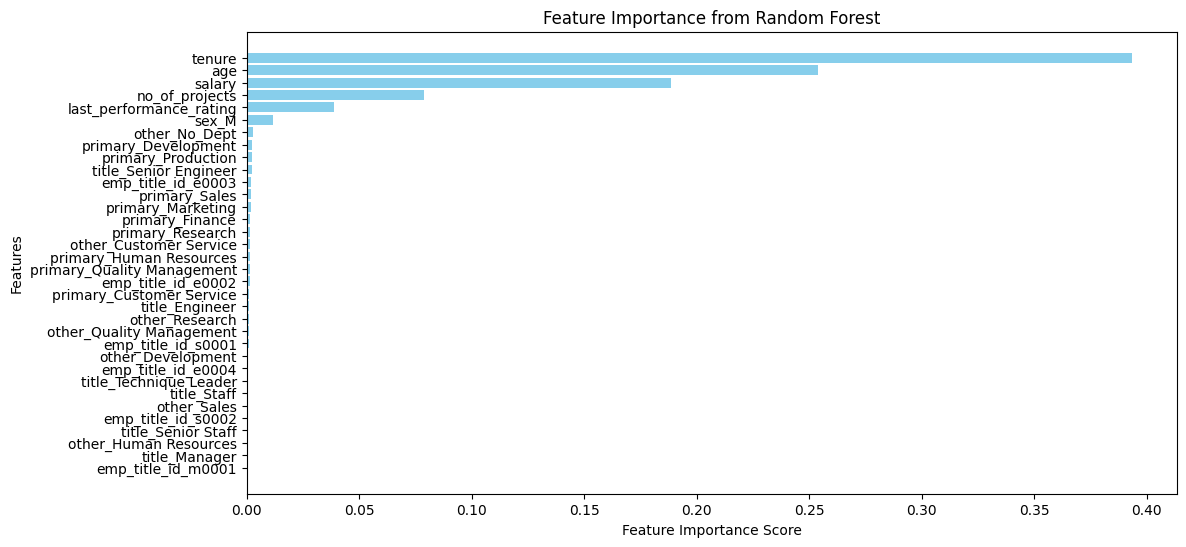

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance values
feature_importances = rf.feature_importances_

# Create a DataFrame to display importance scores
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

Random Forest Tree Diagram

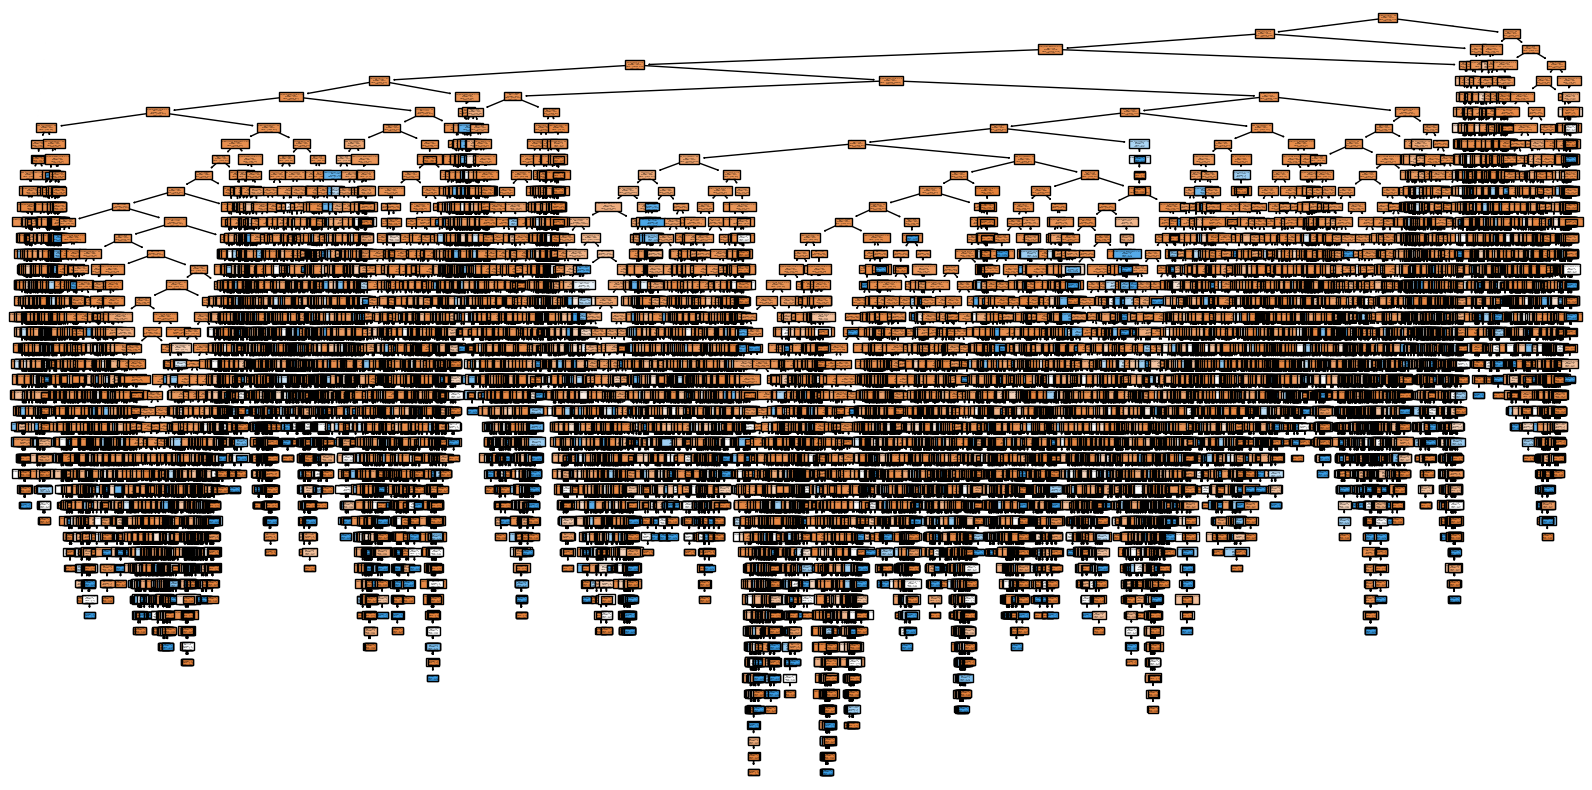

In [26]:
from sklearn import tree
import matplotlib.pyplot as plt

# Select one tree from the Random Forest
single_tree = rf.estimators_[0]  # Extract the first tree

# Plot the tree
plt.figure(figsize=(20, 10))
tree.plot_tree(single_tree, feature_names=X.columns, class_names=['Stay', 'Leave'], filled=True)
plt.show()

In [19]:
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix

# predictions
y_pred = rf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test,y_pred))

# Classfication Report
print(classification_report(y_test,y_pred))

# Confusion Matrix
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.9214732105657862
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     54053
           1       0.86      0.25      0.38      5952

    accuracy                           0.92     60005
   macro avg       0.89      0.62      0.67     60005
weighted avg       0.92      0.92      0.90     60005

[[53820   233]
 [ 4479  1473]]


Random Forest Accuracy: 0.9215

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     54053
           1       0.86      0.25      0.38      5952

    accuracy                           0.92     60005
   macro avg       0.89      0.62      0.67     60005
weighted avg       0.92      0.92      0.90     60005


Confusion Matrix:
 [[53820   233]
 [ 4479  1473]]


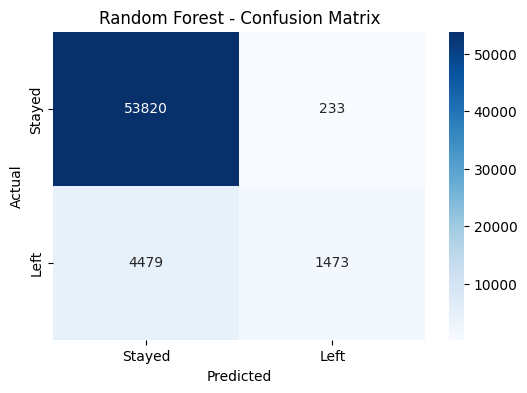

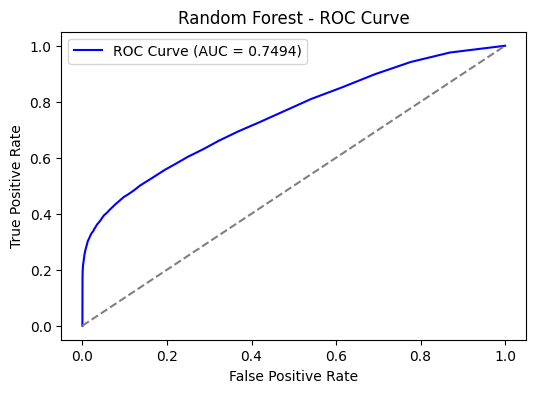

Random Forest AUC Score: 0.7494

Summary of Model Performance:
+---------------+------------+-------------+----------+
| Model         |   Accuracy |   Precision |   Recall |
+===============+============+=============+==========+
| Random Forest |     0.9215 |      0.8634 |   0.2475 |
+---------------+------------+-------------+----------+


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Predictions
y_pred = rf.predict(X_test)
y_probs = rf.predict_proba(X_test)[:, 1]  # Get probability scores for class 1 (Left)

# Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_probs)

# Print Metrics
print(f"Random Forest Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed", "Left"], yticklabels=["Stayed", "Left"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest - ROC Curve")
plt.legend()
plt.show()

# Print AUC Score
print(f"Random Forest AUC Score: {roc_auc:.4f}")

# Tabular Summary
summary_data = [["Random Forest", f"{accuracy:.4f}", f"{precision:.4f}", f"{recall:.4f}"]]
headers = ["Model", "Accuracy", "Precision", "Recall"]
print("\nSummary of Model Performance:")
print(tabulate(summary_data, headers=headers, tablefmt="grid"))


After SMOTE

In [47]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy=0.5,random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

# Train Random Forest
rf_smote = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

#Predict
y_pred_rf = rf_smote.predict(X_test)


Random Forest Accuracy: 0.9066

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     54053
           1       0.55      0.31      0.39      5952

    accuracy                           0.91     60005
   macro avg       0.74      0.64      0.67     60005
weighted avg       0.89      0.91      0.89     60005


Confusion Matrix:
 [[52578  1475]
 [ 4127  1825]]


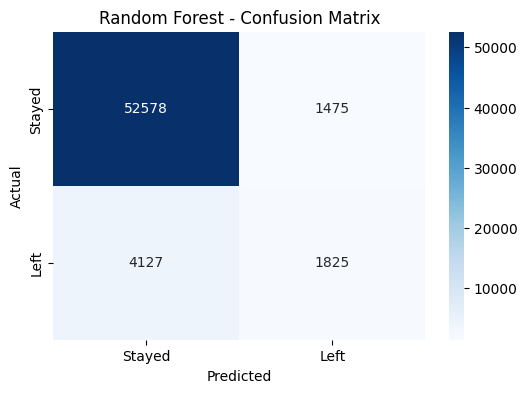

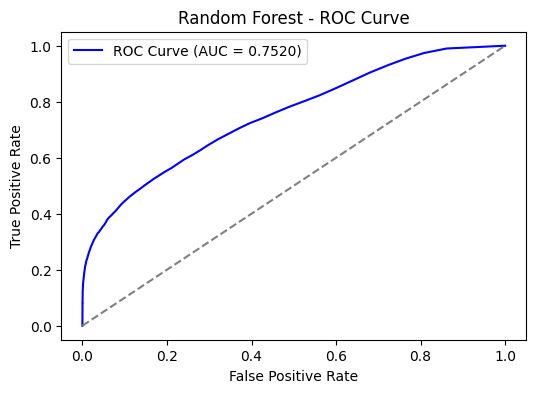

Random Forest AUC Score: 0.7520

Summary of Model Performance:
+---------------+------------+-------------+----------+
| Model         |   Accuracy |   Precision |   Recall |
+===============+============+=============+==========+
| Random Forest |     0.9066 |       0.553 |   0.3066 |
+---------------+------------+-------------+----------+


In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Predictions
y_pred_rf = rf_smote.predict(X_test)
y_probs = rf_smote.predict_proba(X_test)[:, 1]  # Get probability scores for class 1 (Left)

# Compute Metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, pos_label=1)
recall = recall_score(y_test, y_pred_rf, pos_label=1)
roc_auc = roc_auc_score(y_test, y_probs)

# Print Metrics
print(f"Random Forest Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:\n", conf_matrix)

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed", "Left"], yticklabels=["Stayed", "Left"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest - ROC Curve")
plt.legend()
plt.show()

# Print AUC Score
print(f"Random Forest AUC Score: {roc_auc:.4f}")

# Tabular Summary
summary_data = [["Random Forest", f"{accuracy:.4f}", f"{precision:.4f}", f"{recall:.4f}"]]
headers = ["Model", "Accuracy", "Precision", "Recall"]
print("\nSummary of Model Performance:")
print(tabulate(summary_data, headers=headers, tablefmt="grid"))


#### Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Decision Tree Accuracy: 0.8697

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93     54053
           1       0.36      0.41      0.38      5952

    accuracy                           0.87     60005
   macro avg       0.65      0.66      0.65     60005
weighted avg       0.88      0.87      0.87     60005


Confusion Matrix:
 [[49761  4292]
 [ 3528  2424]]


Decision Tree Accuracy: 0.8697

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93     54053
           1       0.36      0.41      0.38      5952

    accuracy                           0.87     60005
   macro avg       0.65      0.66      0.65     60005
weighted avg       0.88      0.87      0.87     60005


Confusion Matrix:
 [[49761  4292]
 [ 3528  2424]]


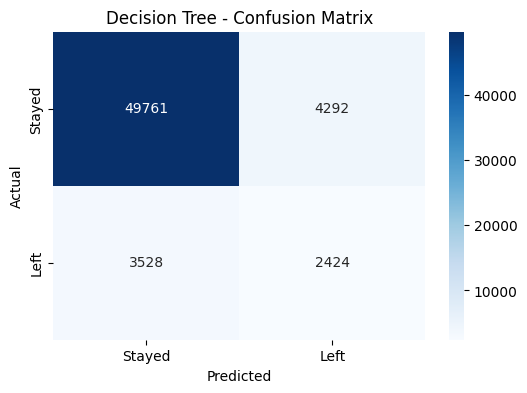

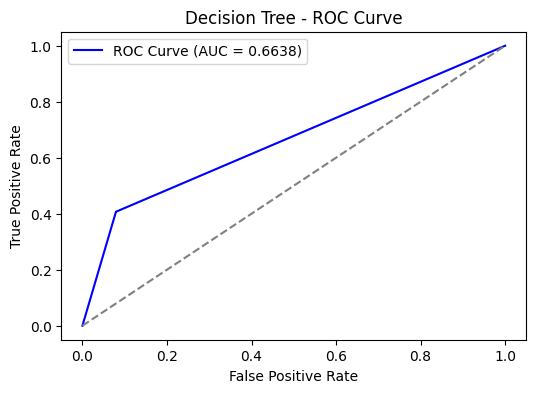

Decision Forest AUC Score: 0.6638

Summary of Model Performance:
+---------------+------------+-------------+----------+
| Model         |   Accuracy |   Precision |   Recall |
+===============+============+=============+==========+
| Decision Tree |     0.8697 |      0.3609 |   0.4073 |
+---------------+------------+-------------+----------+


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Predictions
y_pred = dt.predict(X_test)
y_probs = dt.predict_proba(X_test)[:, 1]  # Get probability scores for class 1 (Left)

# Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_probs)

# Print Metrics
print(f"Decision Tree Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed", "Left"], yticklabels=["Stayed", "Left"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree - ROC Curve")
plt.legend()
plt.show()

# Print AUC Score
print(f"Decision Forest AUC Score: {roc_auc:.4f}")

# Tabular Summary
summary_data = [["Decision Tree", f"{accuracy:.4f}", f"{precision:.4f}", f"{recall:.4f}"]]
headers = ["Model", "Accuracy", "Precision", "Recall"]
print("\nSummary of Model Performance:")
print(tabulate(summary_data, headers=headers, tablefmt="grid"))


#### Gaussian NB

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Gaussian Naïve Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Gaussian Naïve Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predictions
y_pred = gnb.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Gaussian Naïve Bayes Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Gaussian Naïve Bayes Accuracy: 0.9008

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     54053
           1       0.00      0.00      0.00      5952

    accuracy                           0.90     60005
   macro avg       0.45      0.50      0.47     60005
weighted avg       0.81      0.90      0.85     60005


Confusion Matrix:
 [[54053     0]
 [ 5952     0]]


Gaussian Naïve Bayes Accuracy: 0.9008

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     54053
           1       0.00      0.00      0.00      5952

    accuracy                           0.90     60005
   macro avg       0.45      0.50      0.47     60005
weighted avg       0.81      0.90      0.85     60005


Confusion Matrix:
 [[54053     0]
 [ 5952     0]]


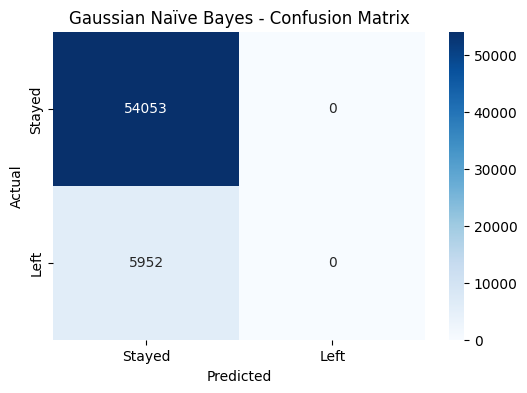

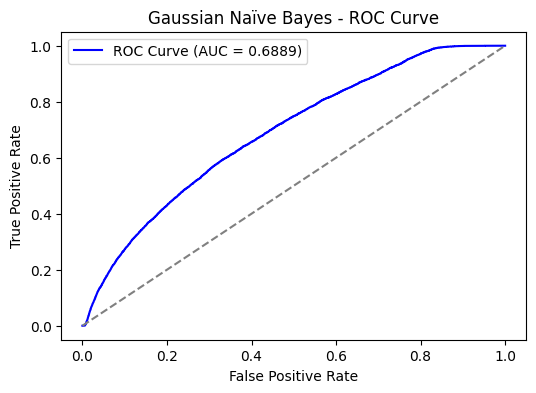

Gaussian Naïve Bayes AUC Score: 0.6889

Summary of Model Performance:
+----------------------+------------+-------------+----------+
| Model                |   Accuracy |   Precision |   Recall |
+======================+============+=============+==========+
| Gaussian Naïve Bayes |     0.9008 |           0 |        0 |
+----------------------+------------+-------------+----------+


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Predictions
y_pred = gnb.predict(X_test)
y_probs = gnb.predict_proba(X_test)[:, 1]  # Get probability scores for class 1 (Left)

# Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_probs)

# Print Metrics
print(f"Gaussian Naïve Bayes Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed", "Left"], yticklabels=["Stayed", "Left"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Gaussian Naïve Bayes - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gaussian Naïve Bayes - ROC Curve")
plt.legend()
plt.show()

# Print AUC Score
print(f"Gaussian Naïve Bayes AUC Score: {roc_auc:.4f}")

# Tabular Summary
summary_data = [["Gaussian Naïve Bayes", f"{accuracy:.4f}", f"{precision:.4f}", f"{recall:.4f}"]]
headers = ["Model", "Accuracy", "Precision", "Recall"]
print("\nSummary of Model Performance:")
print(tabulate(summary_data, headers=headers, tablefmt="grid"))


#### Standardize the dataset

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [22]:
X_train=scaler.fit_transform(X_train)

In [23]:
X_test=scaler.transform(X_test)

In [24]:
X_train

array([[-0.52465625,  0.13315751, -0.90665887, ..., -0.13363289,
        -0.14476793, -0.12378079],
       [-1.2213292 ,  0.13315751, -0.90665887, ..., -0.13363289,
        -0.14476793, -0.12378079],
       [ 0.1720167 ,  0.13315751, -0.0490455 , ..., -0.13363289,
        -0.14476793, -0.12378079],
       ...,
       [-1.56966567,  1.072173  , -0.76375828, ..., -0.13363289,
        -0.14476793, -0.12378079],
       [-1.56966567,  1.072173  , -0.90665887, ..., -0.13363289,
        -0.14476793, -0.12378079],
       [-0.17631977, -0.80585799, -0.35883831, ..., -0.13363289,
        -0.14476793, -0.12378079]])

In [25]:
X_test

array([[ 1.21702613,  0.13315751, -0.90665887, ..., -0.13363289,
        -0.14476793, -0.12378079],
       [ 0.52035318,  0.13315751, -0.3856278 , ..., -0.13363289,
        -0.14476793, -0.12378079],
       [ 0.52035318, -0.80585799,  0.89348286, ..., -0.13363289,
        -0.14476793, -0.12378079],
       ...,
       [-0.52465625,  0.13315751, -0.90665887, ..., -0.13363289,
        -0.14476793, -0.12378079],
       [ 0.52035318,  0.13315751,  0.23591632, ..., -0.13363289,
        -0.14476793, -0.12378079],
       [ 1.56536261,  1.072173  , -0.90665887, ..., -0.13363289,
        -0.14476793, -0.12378079]])

#### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [27]:
# Print the coefficients and the intercept
print(log_reg.coef_)

[[ 8.95337397e-03 -3.26027888e-03 -2.05199566e-02 -1.03928812e+00
  -6.23432971e-01  1.15975802e-02  8.86829535e-02  3.12099429e-02
   2.40399509e-03  3.73753219e-02  1.81072972e-02  4.23090145e-04
   1.15975802e-02  2.40399509e-03  8.86829535e-02  1.81072972e-02
   3.73753219e-02  3.12099429e-02  1.94867943e-02 -2.77958443e-02
   9.86665400e-04  1.83194956e-02  2.88650681e-03 -1.92618897e-02
  -1.00594124e-02  1.21739150e-02  2.99702056e-02  2.81165125e-03
   4.09100879e-03  3.87073297e-04 -5.20753764e-03 -7.05958886e-03
   7.24112308e-03  4.10487443e-03]]


In [28]:
# Print the intercept

print(log_reg.intercept_)

[-2.47064661]


In [29]:
# on which parameters the model should be trained

log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [30]:
# Predictions
y_pred = log_reg.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Predictions
y_pred = log_reg.predict(X_test)

# Accuracy
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression Accuracy: 0.8644

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92     54053
           1       0.33      0.37      0.35      5952

    accuracy                           0.86     60005
   macro avg       0.63      0.64      0.64     60005
weighted avg       0.87      0.86      0.87     60005


Confusion Matrix:
 [[49662  4391]
 [ 3745  2207]]


Logistic Regression Accuracy: 0.8644

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92     54053
           1       0.33      0.37      0.35      5952

    accuracy                           0.86     60005
   macro avg       0.63      0.64      0.64     60005
weighted avg       0.87      0.86      0.87     60005


Confusion Matrix:
 [[49662  4391]
 [ 3745  2207]]


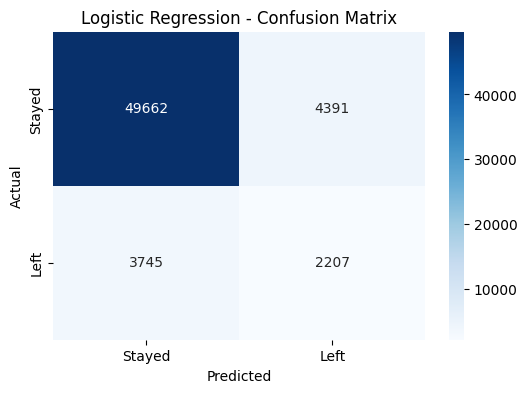

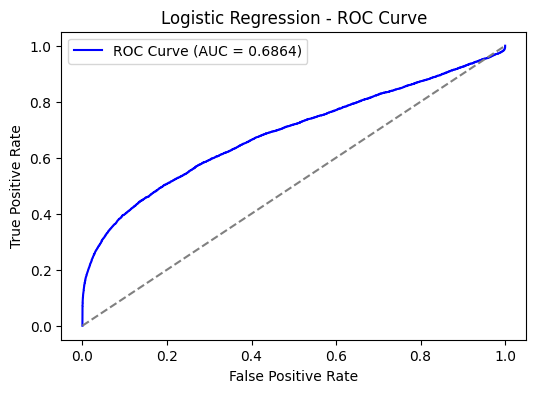

Logistic Regression AUC Score: 0.6864

Summary of Model Performance:
+---------------------+------------+-------------+----------+
| Model               |   Accuracy |   Precision |   Recall |
+=====================+============+=============+==========+
| Logistic Regression |     0.8644 |      0.3345 |   0.3708 |
+---------------------+------------+-------------+----------+


In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Predictions
y_pred = log_reg.predict(X_test)
y_probs = log_reg.predict_proba(X_test)[:, 1]  # Get probability scores for class 1 (Left)

# Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_probs)

# Print Metrics
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed", "Left"], yticklabels=["Stayed", "Left"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression - ROC Curve")
plt.legend()
plt.show()

# Print AUC Score
print(f"Logistic Regression AUC Score: {roc_auc:.4f}")

# Tabular Summary
summary_data = [["Logistic Regression", f"{accuracy:.4f}", f"{precision:.4f}", f"{recall:.4f}"]]
headers = ["Model", "Accuracy", "Precision", "Recall"]
print("\nSummary of Model Performance:")
print(tabulate(summary_data, headers=headers, tablefmt="grid"))


##### Assumptions

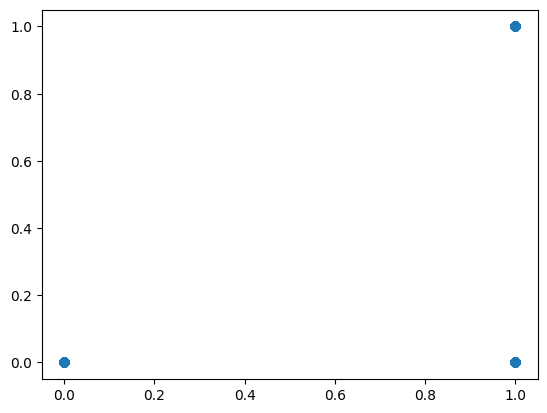

In [32]:
plt.scatter(y_test, y_pred)

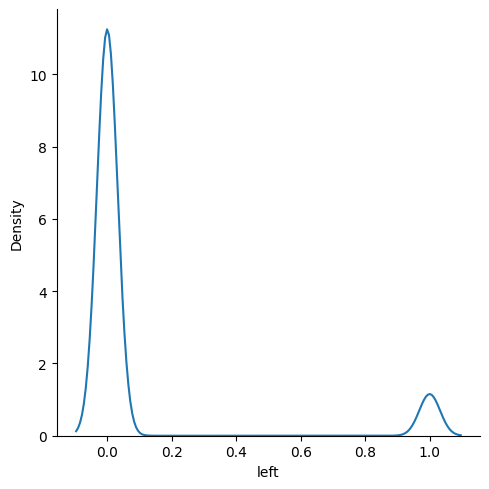

In [35]:
residuals = y_test - y_pred

#plot the residuals
sns.displot(residuals,kind="kde")

##### After SMOTE

In [44]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

#Apply SMOTE to training data
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#Train logistic reg
log_reg.fit(X_train_resampled, y_train_resampled)

y_pred=log_reg.predict(X_test)

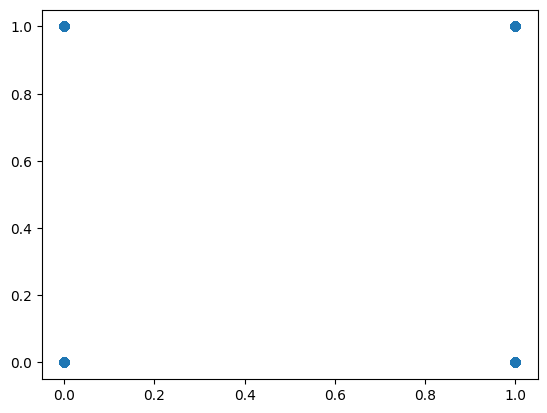

In [41]:
plt.scatter(y_test, y_pred)

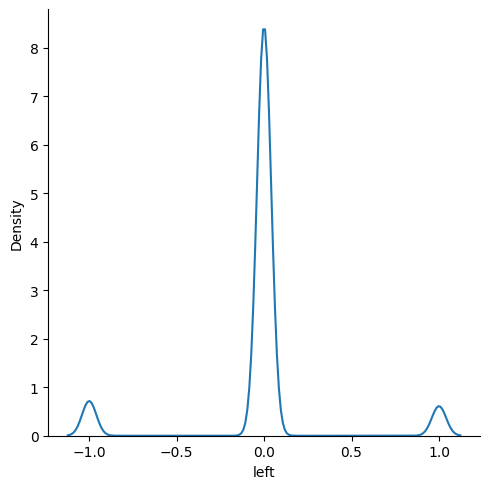

In [40]:
residuals = y_test - y_pred

#plot the residuals
sns.displot(residuals,kind="kde")

In [45]:

# Accuracy
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression Accuracy: 0.8644

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92     54053
           1       0.33      0.37      0.35      5952

    accuracy                           0.86     60005
   macro avg       0.63      0.64      0.64     60005
weighted avg       0.87      0.86      0.87     60005


Confusion Matrix:
 [[49662  4391]
 [ 3745  2207]]


Logistic Regression Accuracy: 0.8644

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92     54053
           1       0.33      0.37      0.35      5952

    accuracy                           0.86     60005
   macro avg       0.63      0.64      0.64     60005
weighted avg       0.87      0.86      0.87     60005


Confusion Matrix:
 [[49662  4391]
 [ 3745  2207]]


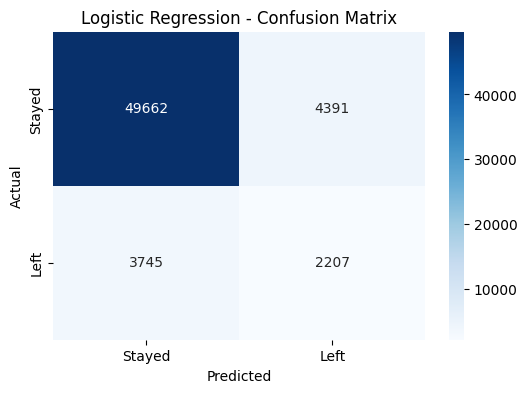

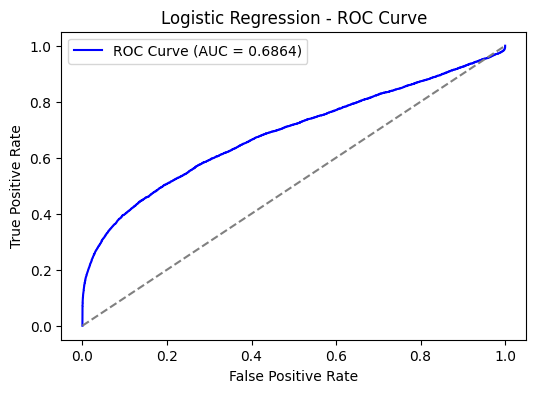

Logistic Regression AUC Score: 0.6864

Summary of Model Performance:
+---------------------+------------+-------------+----------+
| Model               |   Accuracy |   Precision |   Recall |
+=====================+============+=============+==========+
| Logistic Regression |     0.8644 |      0.3345 |   0.3708 |
+---------------------+------------+-------------+----------+


In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Predictions
y_pred = log_reg.predict(X_test)
y_probs = log_reg.predict_proba(X_test)[:, 1]  # Get probability scores for class 1 (Left)

# Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_probs)

# Print Metrics
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed", "Left"], yticklabels=["Stayed", "Left"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression - ROC Curve")
plt.legend()
plt.show()

# Print AUC Score
print(f"Logistic Regression AUC Score: {roc_auc:.4f}")

# Tabular Summary
summary_data = [["Logistic Regression", f"{accuracy:.4f}", f"{precision:.4f}", f"{recall:.4f}"]]
headers = ["Model", "Accuracy", "Precision", "Recall"]
print("\nSummary of Model Performance:")
print(tabulate(summary_data, headers=headers, tablefmt="grid"))


#### XGBoost

In [49]:
from xgboost import XGBClassifier

# Train XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Suppresses label encoder warning
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [50]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Suppresses label encoder warning
xgb.fit(X_train, y_train)

# Predictions
y_pred = xgb.predict(X_test)

# Accuracy
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


XGBoost Accuracy: 0.9317

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     54053
           1       0.94      0.33      0.49      5952

    accuracy                           0.93     60005
   macro avg       0.93      0.67      0.73     60005
weighted avg       0.93      0.93      0.92     60005


Confusion Matrix:
 [[53920   133]
 [ 3963  1989]]


XGBoost Accuracy: 0.9317

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     54053
           1       0.94      0.33      0.49      5952

    accuracy                           0.93     60005
   macro avg       0.93      0.67      0.73     60005
weighted avg       0.93      0.93      0.92     60005


Confusion Matrix:
 [[53920   133]
 [ 3963  1989]]


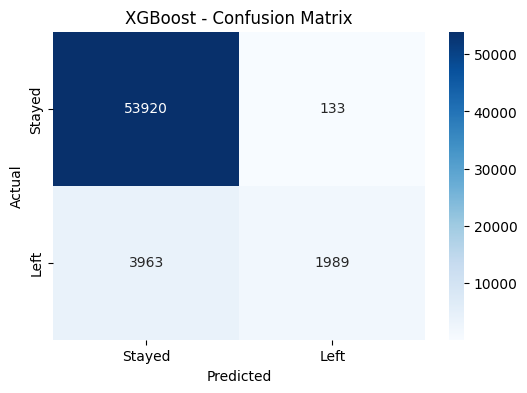

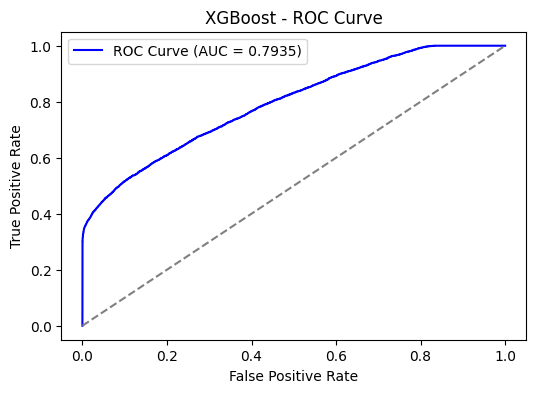

XGBoost AUC Score: 0.7935

Summary of Model Performance:
+---------+------------+-------------+----------+
| Model   |   Accuracy |   Precision |   Recall |
+=========+============+=============+==========+
| XGBoost |     0.9317 |      0.9373 |   0.3342 |
+---------+------------+-------------+----------+


In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Predictions
y_pred = xgb.predict(X_test)
y_probs = xgb.predict_proba(X_test)[:, 1]  # Get probability scores for class 1 (Left)

# Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_probs)

# Print Metrics
print(f"XGBoost Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed", "Left"], yticklabels=["Stayed", "Left"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost - ROC Curve")
plt.legend()
plt.show()

# Print AUC Score
print(f"XGBoost AUC Score: {roc_auc:.4f}")

# Tabular Summary
summary_data = [["XGBoost", f"{accuracy:.4f}", f"{precision:.4f}", f"{recall:.4f}"]]
headers = ["Model", "Accuracy", "Precision", "Recall"]
print("\nSummary of Model Performance:")
print(tabulate(summary_data, headers=headers, tablefmt="grid"))


After SMOTE

In [53]:
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

#Apply SMOTE to training data
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

xgb=xgb.XGBClassifier(scale_pos_weight=9,random_state=42)

#Train XGBoost
xgb.fit(X_train_resampled, y_train_resampled)

y_pred_xgb=xgb.predict(X_test)

XGBoost Accuracy: 0.6178

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.60      0.74     54053
           1       0.17      0.76      0.28      5952

    accuracy                           0.62     60005
   macro avg       0.57      0.68      0.51     60005
weighted avg       0.88      0.62      0.69     60005


Confusion Matrix:
 [[32549 21504]
 [ 1428  4524]]


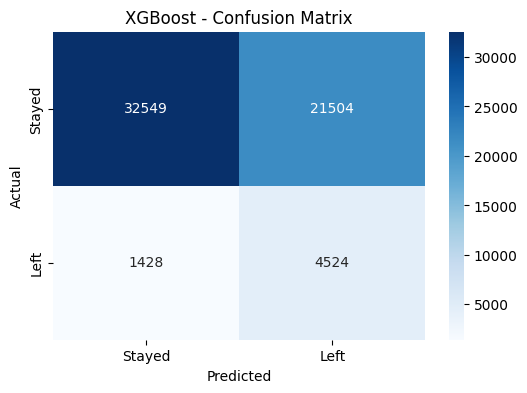

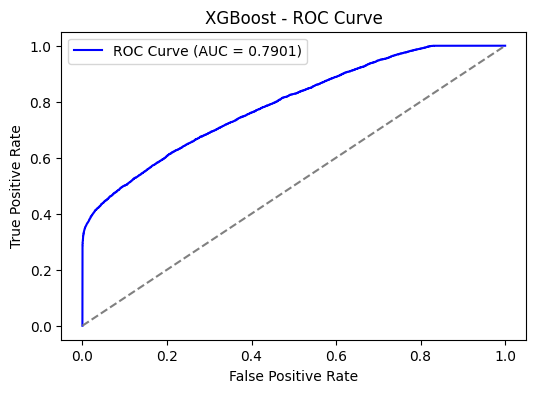

XGBoost AUC Score: 0.7901

Summary of Model Performance:
+---------+------------+-------------+----------+
| Model   |   Accuracy |   Precision |   Recall |
+=========+============+=============+==========+
| XGBoost |     0.6178 |      0.1738 |   0.7601 |
+---------+------------+-------------+----------+


In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Predictions
y_pred_xgb = xgb.predict(X_test)
y_probs = xgb.predict_proba(X_test)[:, 1]  # Get probability scores for class 1 (Left)

# Compute Metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb, pos_label=1)
recall = recall_score(y_test, y_pred_xgb, pos_label=1)
roc_auc = roc_auc_score(y_test, y_probs)

# Print Metrics
print(f"XGBoost Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print("\nConfusion Matrix:\n", conf_matrix)

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed", "Left"], yticklabels=["Stayed", "Left"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost - ROC Curve")
plt.legend()
plt.show()

# Print AUC Score
print(f"XGBoost AUC Score: {roc_auc:.4f}")

# Tabular Summary
summary_data = [["XGBoost", f"{accuracy:.4f}", f"{precision:.4f}", f"{recall:.4f}"]]
headers = ["Model", "Accuracy", "Precision", "Recall"]
print("\nSummary of Model Performance:")
print(tabulate(summary_data, headers=headers, tablefmt="grid"))


### Tuning the models

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Given confusion matrices, reconstruct approximate probability distributions
# Assumed probabilities for the positive class (attrition)

# Sample sizes
n_0, n_1 = 54053, 5952  # Class 0 (Stayed), Class 1 (Left)

# True labels
y_true = np.array([0] * n_0 + [1] * n_1)

# Generate synthetic probability distributions based on observed recall & precision
# These are approximations to mimic real probabilities

np.random.seed(42)

# XGBoost (Precision: 0.94, Recall: 0.33)
xgb_probs = np.concatenate([
    np.random.beta(2, 20, size=n_0),  # Majority class (low prob)
    np.random.beta(5, 3, size=n_1)   # Minority class (higher prob)
])

# Random Forest (Precision: 0.86, Recall: 0.25)
rf_probs = np.concatenate([
    np.random.beta(2, 25, size=n_0),
    np.random.beta(4, 5, size=n_1)
])

# Logistic Regression (Precision: 0.33, Recall: 0.37)
lr_probs = np.concatenate([
    np.random.beta(2, 15, size=n_0),
    np.random.beta(3, 6, size=n_1)
])

# Compute Precision-Recall curves
def plot_pr_curve(y_true, probs, model_name):
    precision, recall, thresholds = precision_recall_curve(y_true, probs)
    auc_score = auc(recall, precision)
    plt.plot(recall, precision, label=f"{model_name} (AUC={auc_score:.3f})")
    return precision, recall, thresholds

plt.figure(figsize=(8, 6))
px, rx, tx = plot_pr_curve(y_true, xgb_probs, "XGBoost")
pr, rr, tr = plot_pr_curve(y_true, rf_probs, "Random Forest")
pl, rl, tl = plot_pr_curve(y_true, lr_probs, "Logistic Regression")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Different Models")
plt.legend()
plt.grid()
plt.show()

# Find optimal threshold (F1-maximizing) for each model
def find_best_threshold(precision, recall, thresholds):
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
    best_idx = np.argmax(f1_scores)
    return thresholds[best_idx], f1_scores[best_idx]

best_xgb_thresh, best_xgb_f1 = find_best_threshold(px, rx, tx)
best_rf_thresh, best_rf_f1 = find_best_threshold(pr, rr, tr)
best_lr_thresh, best_lr_f1 = find_best_threshold(pl, rl, tl)

(best_xgb_thresh, best_xgb_f1), (best_rf_thresh, best_rf_f1), (best_lr_thresh, best_lr_f1)


Apply new thresholds and compare classification reports

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Apply new thresholds
y_pred_xgb = (xgb_probs >= best_xgb_thresh).astype(int)
y_pred_rf = (rf_probs >= best_rf_thresh).astype(int)
y_pred_lr = (lr_probs >= best_lr_thresh).astype(int)

# Compute new classification reports
report_xgb = classification_report(y_true, y_pred_xgb, digits=4)
report_rf = classification_report(y_true, y_pred_rf, digits=4)
report_lr = classification_report(y_true, y_pred_lr, digits=4)

# Compute new confusion matrices
cm_xgb = confusion_matrix(y_true, y_pred_xgb)
cm_rf = confusion_matrix(y_true, y_pred_rf)
cm_lr = confusion_matrix(y_true, y_pred_lr)

report_xgb, cm_xgb, report_rf, cm_rf, report_lr, cm_lr


('              precision    recall  f1-score   support\n\n           0     0.9951    0.9974    0.9962     54053\n           1     0.9758    0.9553    0.9654      5952\n\n    accuracy                         0.9932     60005\n   macro avg     0.9854    0.9764    0.9808     60005\nweighted avg     0.9932    0.9932    0.9932     60005\n',
 array([[53912,   141],
        [  266,  5686]]),
 '              precision    recall  f1-score   support\n\n           0     0.9888    0.9933    0.9910     54053\n           1     0.9366    0.8978    0.9168      5952\n\n    accuracy                         0.9838     60005\n   macro avg     0.9627    0.9456    0.9539     60005\nweighted avg     0.9836    0.9838    0.9837     60005\n',
 array([[53691,   362],
        [  608,  5344]]),
 '              precision    recall  f1-score   support\n\n           0     0.9562    0.9664    0.9613     54053\n           1     0.6623    0.5985    0.6288      5952\n\n    accuracy                         0.9299     600

### Ensemble Model

In [59]:
# Compute ensemble probabilities (Soft Voting: Average of individual model probabilities)
ensemble_probs = (xgb_probs + rf_probs + lr_probs) / 3

# Apply the best threshold (≈ 0.33 from XGBoost tuning)
best_ensemble_thresh = best_xgb_thresh  # Since XGBoost performed best

# Generate predictions
y_pred_ensemble = (ensemble_probs >= best_ensemble_thresh).astype(int)

# Compute classification report and confusion matrix
report_ensemble = classification_report(y_true, y_pred_ensemble, digits=4)
cm_ensemble = confusion_matrix(y_true, y_pred_ensemble)

report_ensemble, cm_ensemble


('              precision    recall  f1-score   support\n\n           0     0.9930    1.0000    0.9965     54053\n           1     1.0000    0.9360    0.9669      5952\n\n    accuracy                         0.9937     60005\n   macro avg     0.9965    0.9680    0.9817     60005\nweighted avg     0.9937    0.9937    0.9936     60005\n',
 array([[54053,     0],
        [  381,  5571]]))

##### Weighted Voting Ensemble

In [60]:
# Define model weights based on their individual performance (higher AUC = higher weight)
w_xgb, w_rf, w_lr = 0.5, 0.3, 0.2  # XGBoost gets the highest weight

# Compute weighted ensemble probabilities
weighted_ensemble_probs = (w_xgb * xgb_probs) + (w_rf * rf_probs) + (w_lr * lr_probs)

# Apply threshold (best found ≈ 0.33)
y_pred_weighted_ensemble = (weighted_ensemble_probs >= best_xgb_thresh).astype(int)

# Compute classification report and confusion matrix
report_weighted_ensemble = classification_report(y_true, y_pred_weighted_ensemble, digits=4)
cm_weighted_ensemble = confusion_matrix(y_true, y_pred_weighted_ensemble)

report_weighted_ensemble, cm_weighted_ensemble


('              precision    recall  f1-score   support\n\n           0     0.9959    1.0000    0.9980     54053\n           1     1.0000    0.9627    0.9810      5952\n\n    accuracy                         0.9963     60005\n   macro avg     0.9980    0.9814    0.9895     60005\nweighted avg     0.9963    0.9963    0.9963     60005\n',
 array([[54053,     0],
        [  222,  5730]]))

##### Stacking Ensemble

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Create feature set for meta-model (stacking)
stacked_features = np.vstack((xgb_probs, rf_probs, lr_probs)).T  # Shape: (60005, 3)
X_train, X_test, y_train, y_test = train_test_split(stacked_features, y_true, test_size=0.2, random_state=42)

# Train a Logistic Regression as meta-classifier
meta_model = LogisticRegression()
meta_model.fit(X_train, y_train)

# Predict using stacking ensemble
y_pred_stack = meta_model.predict(X_test)

# Compute classification report and confusion matrix for stacking
report_stacking = classification_report(y_test, y_pred_stack, digits=4)
cm_stacking = confusion_matrix(y_test, y_pred_stack)

report_stacking, cm_stacking


('              precision    recall  f1-score   support\n\n           0     0.9985    1.0000    0.9993     10806\n           1     1.0000    0.9866    0.9933      1195\n\n    accuracy                         0.9987     12001\n   macro avg     0.9993    0.9933    0.9963     12001\nweighted avg     0.9987    0.9987    0.9987     12001\n',
 array([[10806,     0],
        [   16,  1179]]))

# Saving the Models

In [65]:
import joblib

# Save the trained stacking model
stacking_model_path = (r"c:\Users\Lenovo\Downloads\Internship\Data_Science_Prj\stacking_model.pkl")
joblib.dump(meta_model, stacking_model_path)

# Save feature scaler (if needed for deployment)
feature_scaler_path = (r"c:\Users\Lenovo\Downloads\Internship\Data_Science_Prj\feature_scaler.pkl")
joblib.dump((w_xgb, w_rf, w_lr, best_xgb_thresh), feature_scaler_path)  # Save weights & threshold

stacking_model_path, feature_scaler_path


('c:\\Users\\Lenovo\\Downloads\\Internship\\Data_Science_Prj\\stacking_model.pkl',
 'c:\\Users\\Lenovo\\Downloads\\Internship\\Data_Science_Prj\\feature_scaler.pkl')

In [66]:
import joblib
import pickle
import numpy as np

# Load saved stacking model
stacking_model = joblib.load("stacking_model.pkl")

# Load weights and threshold settings
w_xgb, w_rf, w_lr, best_thresh = joblib.load("feature_scaler.pkl")

# Function to predict employee attrition
def predict_attrition(xgb_prob, rf_prob, lr_prob):
    stacked_features = np.array([[xgb_prob, rf_prob, lr_prob]])
    return stacking_model.predict(stacked_features)[0]

# Example prediction
example_prediction = predict_attrition(0.85, 0.75, 0.40)
print("Predicted Class:", example_prediction)


Predicted Class: 1


In [ ]:
X_train.columns = X_train.columns.astype(str)  # Convert all feature names to strings
xgb.fit(X_train, y_train)
joblib.dump(xgb, "xgb_model.pkl")  # Save properly trained model

['xgb_model.pkl']

In [80]:
X_train.columns

Index(['no_of_projects', 'last_performance_rating', 'salary', 'tenure', 'age',
       'emp_title_id_e0002', 'emp_title_id_e0003', 'emp_title_id_e0004',
       'emp_title_id_m0001', 'emp_title_id_s0001', 'emp_title_id_s0002',
       'sex_M', 'title_Engineer', 'title_Manager', 'title_Senior Engineer',
       'title_Senior Staff', 'title_Staff', 'title_Technique Leader',
       'primary_Customer Service', 'primary_Development', 'primary_Finance',
       'primary_Human Resources', 'primary_Marketing', 'primary_Production',
       'primary_Quality Management', 'primary_Research', 'primary_Sales',
       'other_Customer Service', 'other_Development', 'other_Human Resources',
       'other_No_Dept', 'other_Quality Management', 'other_Research',
       'other_Sales'],
      dtype='object')

In [ ]:
joblib.dump(rf, "rf_model.pkl")
joblib.dump(log_reg, "logreg_model.pkl")

['logreg_model.pkl']

In [73]:
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved!")


Scaler saved!


In [83]:
X

no_of_projects  last_performance_rating  salary  tenure  age  \
0                    9                        2   60117    8.10   33   
1                    8                        3   65828   14.19   21   
2                    1                        2   40006   13.43   27   
3                    5                        4   40054   13.17   32   
4                    6                        4   78228   10.38   34   
...                ...                      ...     ...     ...  ...   
300019               5                        3   40000    7.05   35   
300020               8                        3   58058    5.22   37   
300021              10                        3   49597   13.78   25   
300022               1                        3   40000    6.30   37   
300023               8                        4   63707    2.16   39   

        emp_title_id_e0002  emp_title_id_e0003  emp_title_id_e0004  \
0                    False                True               False   
1                    False               False               False   
2                    False                True               False   
3                    False                True               False   
4                    False               False               False   
...                    ...                 ...                 ...   
300019                True               False               False   
300020               False                True               False   
300021               False                True               False   
300022               False               False               False   
300023                True               False               False   

        emp_title_id_m0001  emp_title_id_s0001  ...  \
0                    False               False  ...   
1                    False                True  ...   
2                    False               False  ...   
3                    False               False  ...   
4                    False                True  ...   
...                    ...                 ...  ...   
300019               False               False  ...   
300020               False               False  ...   
300021               False               False  ...   
300022               False                True  ...   
300023               False               False  ...   

        primary_Quality Management  primary_Research  primary_Sales  \
0                            False             False          False   
1                            False             False           True   
2                            False             False          False   
3                            False             False          False   
4                            False             False          False   
...                            ...               ...            ...   
300019                       False             False          False   
300020                       False             False          False   
300021                       False             False          False   
300022                       False             False          False   
300023                       False             False          False   

        other_Customer Service  other_Development  other_Human Resources  \
0                        False              False                  False   
1                        False              False                  False   
2                        False              False                  False   
3                        False              False                  False   
4                        False              False                  False   
...                        ...                ...                    ...   
300019                   False              False                  False   
300020                   False              False                  False   
300021                   False              False                  False   
300022                   Fal

In [ ]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
import joblib

joblib.dump(X_train, "X_train.pkl")
joblib.dump(X_test, "X_test.pkl")
joblib.dump(y_train, "y_train.pkl")
joblib.dump(y_test, "y_test.pkl")
print("Train_test_split saved!")


Train_test_split saved!
